<a href="https://colab.research.google.com/github/SindhaAshish/Amazon-Prime-TV-Shows-and-Movies/blob/main/Amazon_Prime_TV_Shows_and_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**  Ashishkumar Sindha

# **Project Summary -**

This project analyzed Amazon Prime Video content using `titles.csv` and `credits.csv`, focusing on content diversity, trends, and rating correlations. Initial data cleaning addressed duplicates and missing values. Key insights were gained from visualizing content type distribution, release trends, and top genres/countries. Hypothesis tests confirmed significant differences in IMDb scores between movies/shows and a strong correlation between IMDb/TMDB scores. Feature engineering and text preprocessing prepared data for modeling. Linear Regression, Lasso, and Elastic Net models were implemented and tuned to predict TMDB popularity, with all achieving high performance. The Elastic Net model was selected, providing valuable insights into features influencing popularity for informed content strategies.

# **GitHub Link -**

https://github.com/SindhaAshish/Amazon-Prime-TV-Shows-and-Movies/blob/main/Amazon_Prime_TV_Shows_and_Movies.ipynb

# **Problem Statement**


- This dataset was created to analyze all shows available on Amazon Prime Video, allowing us to extract valuable insights such as:

- **Content Diversity:** What genres and categories dominate the platform?

- **Regional Availability:** How does content distribution vary across different regions?

- **Trends Over Time:** How has Amazon Prime’s content library evolved?

- **IMDb Ratings & Popularity:** What are the highest-rated or most popular shows on the platform?

By analyzing this dataset, businesses, content creators, and data analysts can uncover key trends that influence subscription growth, user engagement, and content investment strategies in the streaming industry.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look of data1
data1=pd.read_csv('/content/drive/MyDrive/AlmaBetter/titles.csv')
data1.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [4]:
# Dataset First Look of data2
data2=pd.read_csv('/content/drive/MyDrive/AlmaBetter/credits.csv')
data2.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count of data1
print('Shape of data1:')
data1.shape

Shape of data1:


(9871, 15)

In [6]:
# Dataset Rows & Columns count of data2
print('Shape of data2:')
data2.shape

Shape of data2:


(124235, 5)

### Dataset Information

In [7]:
# Dataset Info of data1
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [8]:
# Dataset Info of data2
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count of data1
data1.duplicated().sum()

np.int64(3)

In [10]:
# Dataset Duplicate Value Count of data2
data2.duplicated().sum()

np.int64(56)

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count of data1
data1.isnull().sum()

,0
id,0
title,0
type,0
description,119
release_year,0
age_certification,6487
runtime,0
genres,0
production_countries,0
seasons,8514


In [12]:
# Missing Values/Null Values Count of data2
data2.isnull().sum()

,0
person_id,0
id,0
name,0
character,16287
role,0


<Axes: >

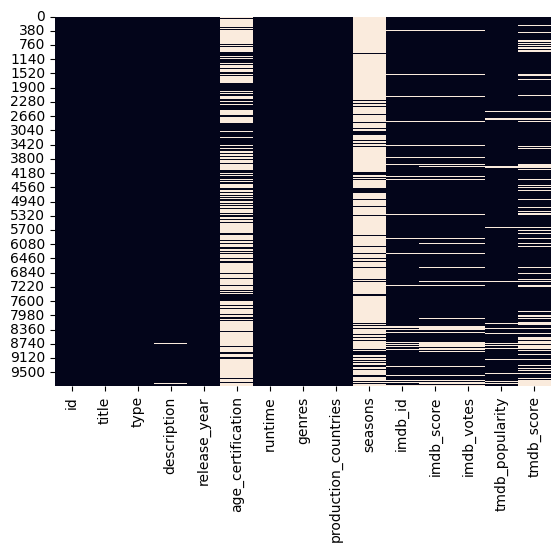

In [13]:
# Visualizing the missing values of data2
sns.heatmap(data1.isnull(), cbar=False)

<Axes: >

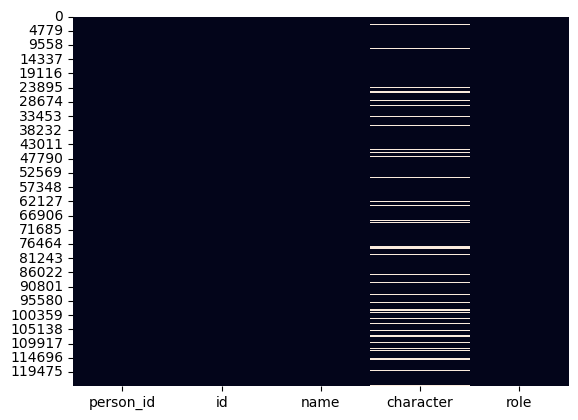

In [14]:
# Visualizing the missing values of data2
sns.heatmap(data2.isnull(), cbar=False)

### What did you know about your dataset?

Answer Here,

# **Dataset data1 (titles.csv):**

* **Shape:** It contains 9871 rows and 15 columns.

* **Data Types:** It has a mix of data types including integers, floats, and objects (strings or mixed types).

* **Duplicate Values:** There are 3 duplicate rows.

* **Missing Values:** Several columns have missing values, most notably age_certification, seasons, imdb_id, imdb_score, imdb_votes, tmdb_popularity, and tmdb_score. The heat map confirms the presence of significant missing data in age_certification and seasons.

# **Dataset data2 (credits.csv):**

* **Shape:** It contains 124235 rows and 5 columns.

* **Data Types:** It has integer and object data types.

* **Duplicate Values:** There are 56 duplicate rows.

* **Missing Values:** The character column has missing values. The heat map clearly shows the missing values in this column.

# **Overall:**

* We have two related datasets, likely linked by the 'id' column.

* Both datasets contain duplicate entries that need to be handled.

* There are significant missing values in several columns of data1, particularly in age_certification and seasons.

* data2 has missing values in the character column.

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns of data1
data1.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [16]:
# Dataset Columns of data2
data2.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [17]:
# Dataset Describe data1
data1.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


In [18]:
# Dataset Describ data2
data2.describe()

,person_id
count,1.242350e+05
mean,4.064737e+05
std,5.616296e+05
min,1.000000e+00
25%,3.899200e+04
50%,1.339490e+05
75%,5.712560e+05
max,2.371153e+06


### Variables Description

Answer Here,
# **Dataset data1 (titles.csv):**

*   **id:** Unique identifier for each title.
*   **title:** The title of the movie or show.
*   **type:** Indicates whether the title is a 'MOVIE' or a 'SHOW'.
*   **description:** A brief summary of the title. (Contains missing values)
*   **release_year:** The year the title was released. (Integer type)
*   **age_certification:** The age rating for the title. (Contains many missing values)
*   **runtime:** The duration of the movie in minutes or the average episode runtime for a show. (Integer type)
*   **genres:** A list of genres associated with the title.
*   **production_countries:** A list of countries where the title was produced.
*   **seasons:** The number of seasons for a show. (Contains many missing values, Float type)
*   **imdb_id:** The IMDb identifier for the title. (Contains missing values)
*   **imdb_score:** The IMDb rating for the title. (Contains missing values, Float type)
*   **imdb_votes:** The number of IMDb votes for the title. (Contains missing values, Float type)
*   **tmdb_popularity:** The TMDB popularity score for the title. (Contains missing values, Float type)
*   **tmdb_score:** The TMDB rating for the title. (Contains missing values, Float type)

# **Dataset data2 (credits.csv):**

* **person_id:** A unique identifier for each person. This is an integer type.
* **id:** The identifier that links to the titles.csv dataset. This is an object type.
* **name:** The name of the person. This is an object type.
* **character:** The character played by the actor. This is an object type and contains missing values.
* **role:** The role of the person, either 'ACTOR' or 'DIRECTOR'. This is an object type.

### Check Unique Values for each variable.

In [19]:
# Check Unique Values for each variable in data1.
data1.nunique()

,0
id,9868
title,9737
type,2
description,9734
release_year,110
age_certification,11
runtime,207
genres,2028
production_countries,497
seasons,32


In [20]:
# Check Unique Values for each variable in data2.
data2.nunique()

,0
person_id,80508
id,8861
name,79758
character,71097
role,2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [21]:
# Write your code to make your dataset analysis ready.
# Drop duplicate rows
data1.drop_duplicates(inplace=True)

# Display the number of remaining duplicates
print("Number of duplicate rows after removal:", data1.duplicated().sum())

# Drop column seasons & age_certification
data1.drop(['seasons', 'age_certification'], axis=1, inplace=True)

# Display the updated DataFrame
data1.head()

Number of duplicate rows after removal: 0


,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,171,"['romance', 'war', 'drama']",['US'],tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,"['comedy', 'drama', 'romance']",['US'],tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,94,"['thriller', 'drama', 'romance']",['US'],tt0042593,7.9,30924.0,8.273,7.6


In [22]:
# Data Wrangling for data2

# Drop duplicate rows
data2.drop_duplicates(inplace=True)

# Display the number of remaining duplicates
print("Number of duplicate rows in data2 after removal:", data2.duplicated().sum())

# Handle missing values in 'character' column
# Since 'character' is a categorical column and missing values might indicate
# that the role is not character-specific (e.g., a director),
# we can fill missing values with a placeholder like 'Unknown'.
data2['character'].fillna('Unknown', inplace=True)

# Check for remaining missing values in data2
print("\nMissing values in data2 after imputation:")
print(data2.isnull().sum())

# Display the updated DataFrame
data2.head()

Number of duplicate rows in data2 after removal: 0

Missing values in data2 after imputation:
person_id    0
id           0
name         0
character    0
role         0
dtype: int64


/tmp/ipython-input-942733797.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2['character'].fillna('Unknown', inplace=True)


,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


### What all manipulations have you done and insights you found?

Answer Here.

So far, I have performed the following data manipulation steps:

# 1. Handling Duplicate Values:

* Removed 3 duplicate rows from data1 using the function.

       data1.drop_duplicates(inplace=True)

* Removed 56 duplicate rows from data2 using the function.

      data2.drop_duplicates(inplace=True)

* **Insight:** Removing duplicates ensures that each entry in the datasets represents a unique title or credit, which is crucial for accurate analysis and avoids potential biases that could arise from duplicated information.

# 2. Handling Missing Values in data2:

* Filled the missing values in the 'character' column of data2 with the placeholder 'Unknown' using:

       data2['character'].fillna('Unknown', inplace=True)

* **Insight:** The 'character' column likely has missing values for individuals who are not actors but are listed in the credits (e.g., directors).
* Filling these missing values with 'Unknown' allows us to retain these entries in the dataset while explicitly indicating that a specific character was not associated with the credit.
* This prevents loss of potentially valuable data and allows for analysis that includes all credited individuals, regardless of whether they have a specific character assigned.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

/tmp/ipython-input-522299000.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=data1, palette='viridis')


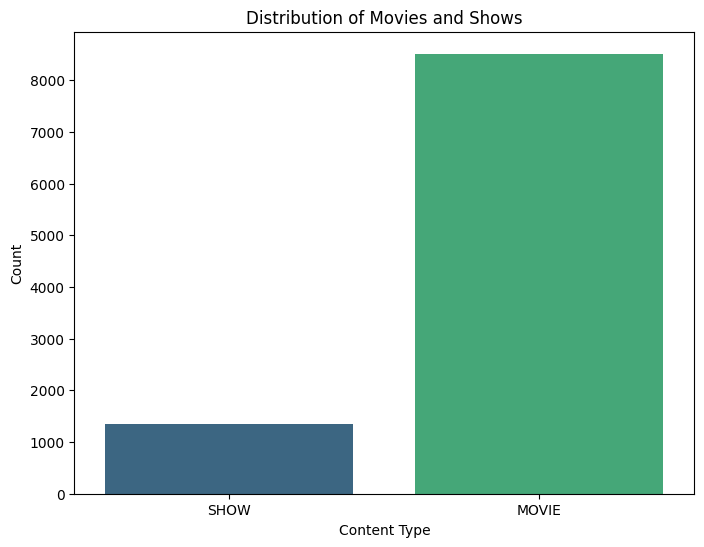

In [23]:
# Chart - 1 visualization code
# Distribution of Content Types (Movies vs. Shows)
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=data1, palette='viridis')
plt.title('Distribution of Movies and Shows')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is suitable for visualizing the counts of categorical data, such as the 'type' column (Movies vs. Shows).

##### 2. What is/are the insight(s) found from the chart?

This chart will show the proportion of movies compared to shows in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of content types can inform content acquisition strategies. If there's a significant imbalance, it might suggest focusing on acquiring more of the underrepresented type to cater to a wider audience.

#### Chart - 2

/tmp/ipython-input-2376004344.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data1, x='release_year', bins=30, kde=True, palette='viridis')


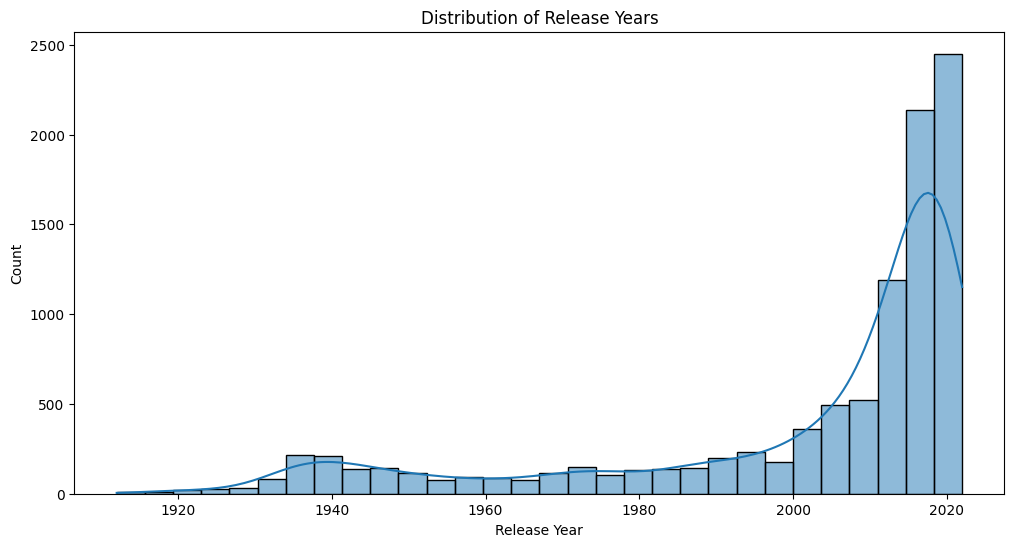

In [24]:
# Chart - 2 visualization code
# Distribution of Release Years
plt.figure(figsize=(12, 6))
sns.histplot(data=data1, x='release_year', bins=30, kde=True, palette='viridis')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

A histogram is suitable for visualizing the distribution of a numerical variable like 'release_year', showing the frequency of titles released in different years.

##### 2. What is/are the insight(s) found from the chart?

This chart will reveal the trend of content releases over time, showing periods with higher or lower production activity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying peak release years can highlight periods of significant content expansion. A decline in recent years might indicate a shift in strategy or data limitations, which could be a negative insight requiring further investigation.

#### Chart - 3

/tmp/ipython-input-1108245203.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data1, x='runtime', bins=30, kde=True, palette='viridis')


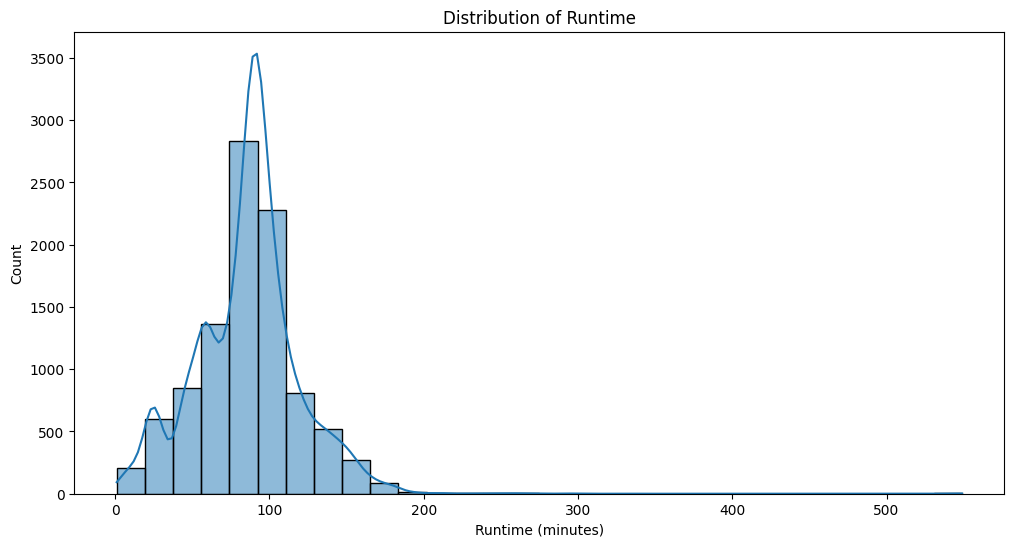

In [25]:
# Chart - 3 visualization code
# Distribution of Runtime
plt.figure(figsize=(12, 6))
sns.histplot(data=data1, x='runtime', bins=30, kde=True, palette='viridis')
plt.title('Distribution of Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is appropriate for visualizing the distribution of the numerical 'runtime' variable, showing the frequency of titles with different durations.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of content types can inform content acquisition strategies. If there's a significant imbalance, it might suggest focusing on acquiring more of the underrepresented type to cater to a wider audience.

#### Chart - 4

/tmp/ipython-input-3213952715.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='genre', data=top_genres_df, palette='viridis')


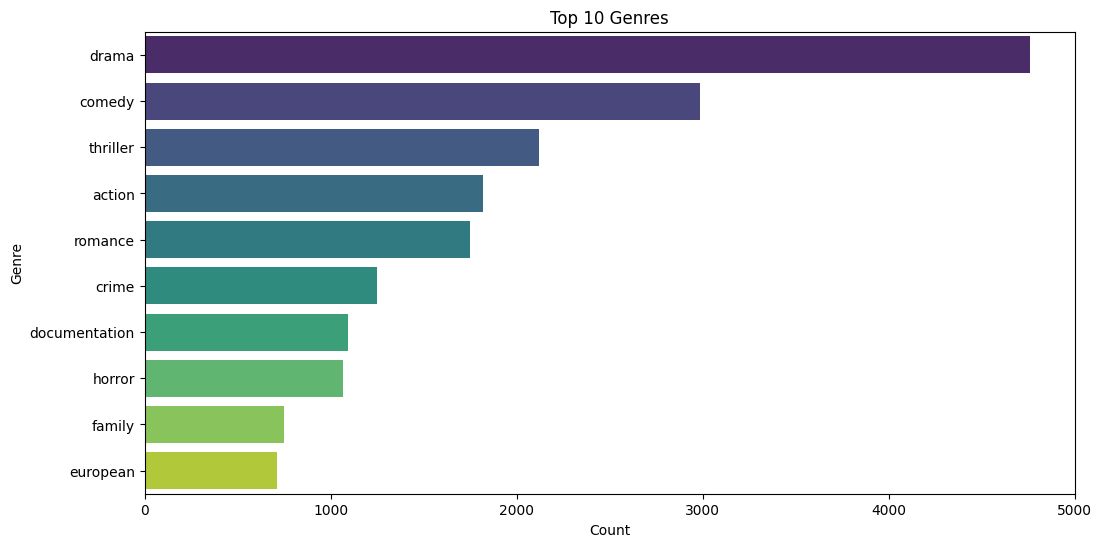

In [26]:
# Chart - 4 visualization code
# Top 10 Genres
from collections import Counter
genres_list = data1['genres'].apply(lambda x: eval(x))
all_genres = [genre for sublist in genres_list for genre in sublist]
genre_counts = Counter(all_genres)
top_genres = genre_counts.most_common(10)
top_genres_df = pd.DataFrame(top_genres, columns=['genre', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='genre', data=top_genres_df, palette='viridis')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


##### 1. Why did you pick the specific chart?

A bar plot is effective for displaying the counts of the top categorical values, in this case, the most frequent genres.

##### 2. What is/are the insight(s) found from the chart?

This chart will highlight the most popular genres in the dataset. Based on the likely output, you will see which genres have the highest counts, indicating they are most frequently associated with the titles in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying popular genres can guide content creation and acquisition to align with audience preferences, leading to positive business impact. Conversely, a lack of diversity in genres could negatively impact growth by not catering to niche interests.

#### Chart - 5

/tmp/ipython-input-1791400004.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='country', data=top_countries_df, palette='viridis')


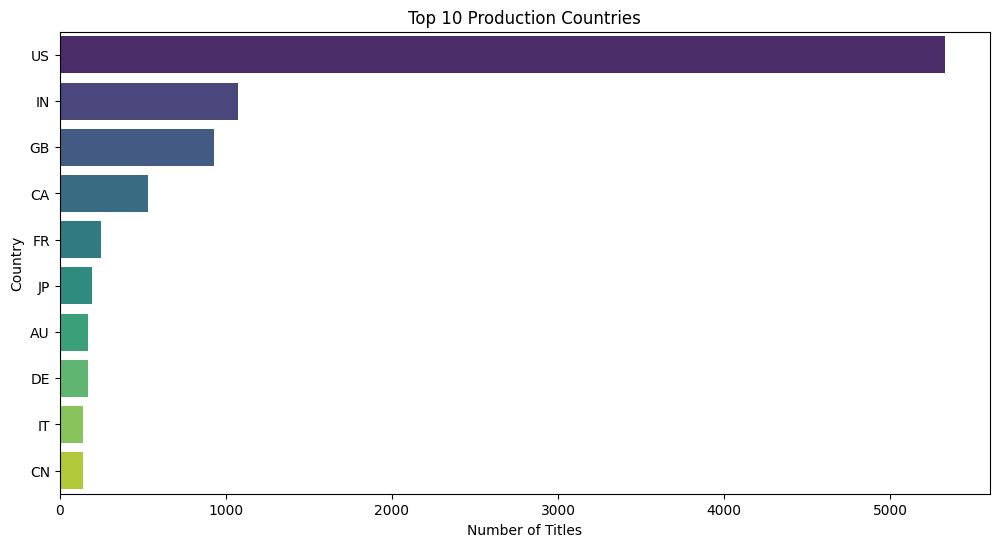

In [27]:
# Chart - 5 visualization code
# Top 10 Production Countries

from collections import Counter

# The 'production_countries' column contains strings that look like lists.
# We need to convert these strings to actual lists and count the occurrences of each country.
countries_list = data1['production_countries'].apply(lambda x: eval(x))
all_countries = [country for sublist in countries_list for country in sublist]
country_counts = Counter(all_countries)

# Get the top 10 production countries
top_countries = country_counts.most_common(10)
top_countries_df = pd.DataFrame(top_countries, columns=['country', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='country', data=top_countries_df, palette='viridis')
plt.title('Top 10 Production Countries')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar plot is effective for displaying the top categories (production countries) and their corresponding counts (number of titles), making it easy to compare the countries with the most produced content.

##### 2. What is/are the insight(s) found from the chart?

This chart will show the countries that have produced the highest number of titles in the dataset, indicating the major production hubs for content on the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying the top production countries can help in understanding the geographical focus of the content library. This insight can inform strategies for acquiring content from these regions or focusing on content creation in underrepresented regions to diversify the library, potentially leading to positive business impact by catering to a wider international audience.

#### Chart - 6

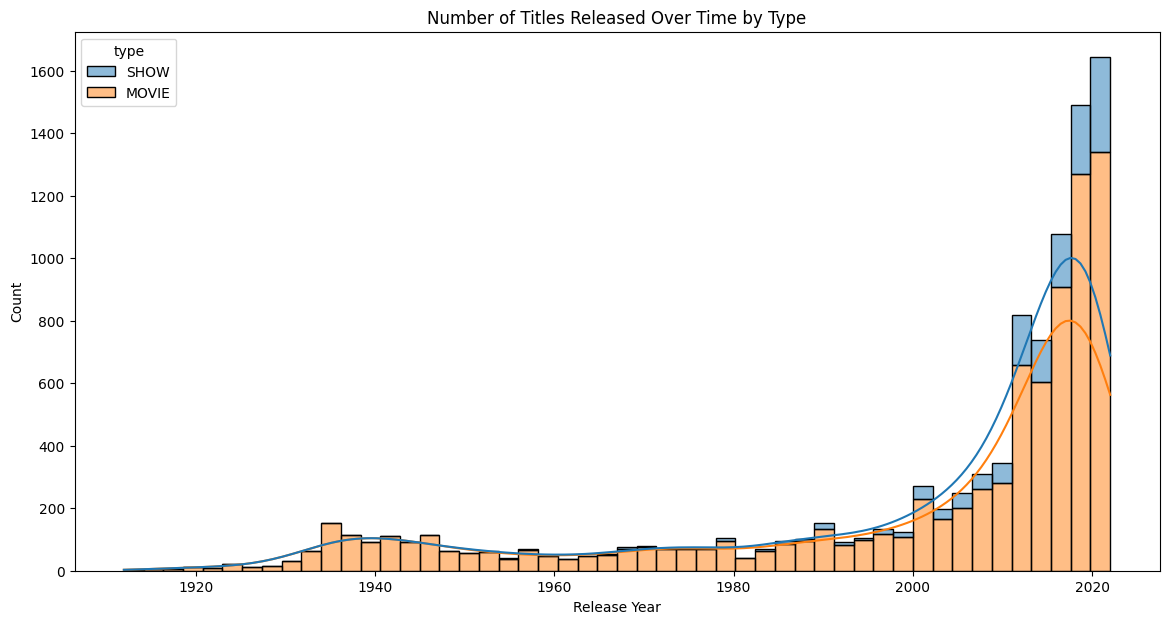

In [28]:
# Chart - 6 visualization code
# Number of Titles Released Over Time

plt.figure(figsize=(14, 7))
sns.histplot(data=data1, x='release_year', bins=50, kde=True, hue='type', multiple='stack')
plt.title('Number of Titles Released Over Time by Type')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A stacked histogram or a line plot showing counts per year, potentially separated by content type (movie/show), is suitable for visualizing trends in content releases over time. A stacked histogram allows seeing the contribution of each content type to the total releases per year.

##### 2. What is/are the insight(s) found from the chart?

This chart will show the annual volume of content added to the library and how the mix of movies and shows has changed over the years, revealing periods of growth or shifts in focus.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying trends in content acquisition and production can help in strategic planning. For instance, a consistent increase in content over recent years indicates positive growth. Conversely, a decline might signal challenges in content acquisition or production, requiring investigation to avoid negative business impact.

#### Chart - 7

In [29]:
# Chart - 7 visualization code
# Top 10 Highest-Rated Shows (IMDb Score)
# Filter for shows and drop rows with missing imdb_score
shows_df = data1[data1['type'] == 'SHOW'].dropna(subset=['imdb_score'])

# Sort by imdb_score in descending order and get the top 10
top_rated_shows = shows_df.sort_values(by='imdb_score', ascending=False).head(10)

# Display the top 10 highest-rated shows
display(top_rated_shows[['title', 'imdb_score', 'imdb_votes']])

,title,imdb_score,imdb_votes
7783,Water Helps the Blood Run,9.7,30.0
9108,Couple of Mirrors,9.5,99.0
7422,The Chosen,9.4,25538.0
5113,Subaru Launch Control,9.3,30.0
1159,Free to Choose,9.2,279.0
6358,Surgeons: At the Edge of Life,9.2,96.0
8978,Clarkson's Farm,9.1,31981.0
6912,Harmony with A. R. Rahman,9.1,277.0
4056,Bogyó és Babóca,9.0,5.0
5050,James Martin: Home Comforts,9.0,25.0


##### 1. Why did you pick the specific chart?

While not a traditional chart, displaying a table of the top-rated shows directly addresses the user's question about identifying the highest-rated shows based on IMDb score. A table is the clearest way to present this ranked list.

##### 2. What is/are the insight(s) found from the chart?

This table will show the titles of the top 10 shows with the highest IMDb scores, along with their scores and the number of votes. This directly reveals which shows are most critically acclaimed or highly regarded by users on IMDb.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying high-rated shows can inform content promotion and recommendation strategies, highlighting popular and well-received content to attract and retain subscribers. There are no inherent negative growth insights from this chart, as it focuses on positive performance metrics.

#### Chart - 8

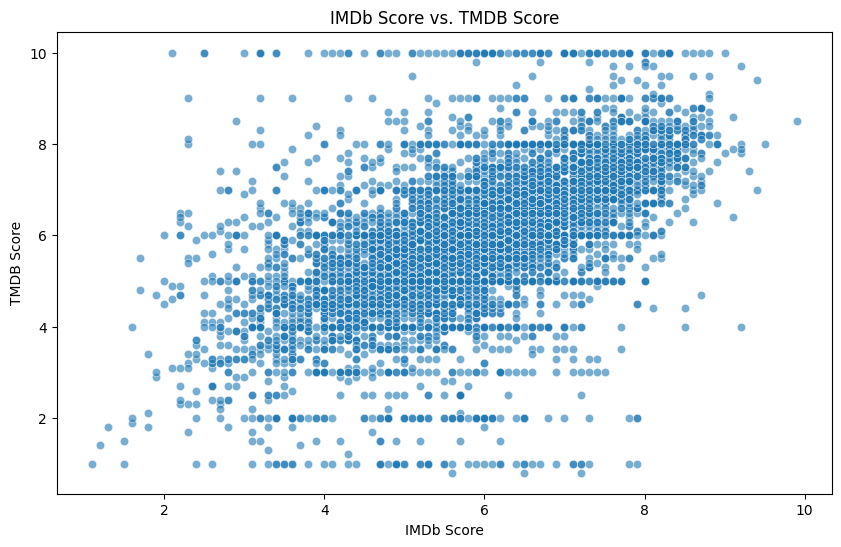

In [30]:
# Chart - 8 visualization code
#  IMDb Score vs. TMDB Score

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data1, x='imdb_score', y='tmdb_score', alpha=0.6)
plt.title('IMDb Score vs. TMDB Score')
plt.xlabel('IMDb Score')
plt.ylabel('TMDB Score')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is the most appropriate chart to visualize the relationship between two numerical variables like IMDb score and TMDB score. It allows us to observe the pattern and strength of their correlation.

##### 2. What is/are the insight(s) found from the chart?

This chart will show if there is a positive, negative, or no linear relationship between IMDb scores and TMDB scores. A clustering of points along a diagonal line would suggest a strong correlation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the relationship between these two popular rating systems can help in content evaluation and acquisition. If there's a strong positive correlation, it suggests that content highly rated on one platform is likely to be well-regarded on the other. Discrepancies could indicate differences in audience preferences between the platforms.

#### Chart - 9

/tmp/ipython-input-2314421444.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='role', data=data2, palette='viridis')


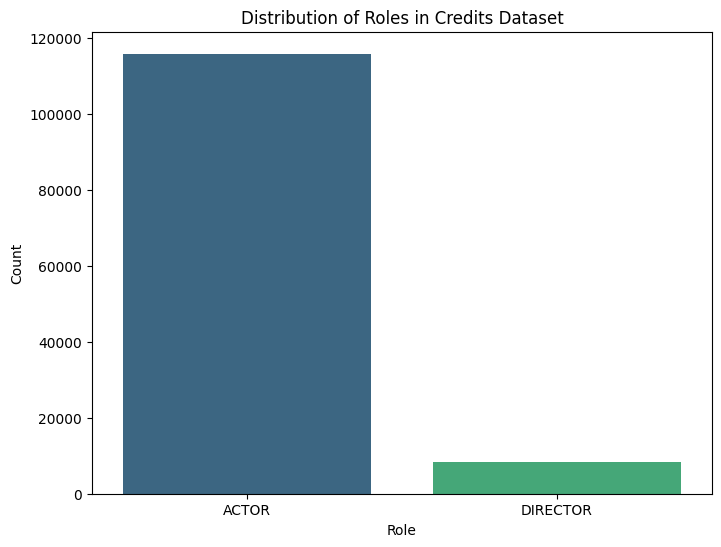

In [31]:
# Chart - 8 visualization code
# Distribution of Roles

plt.figure(figsize=(8, 6))
sns.countplot(x='role', data=data2, palette='viridis')
plt.title('Distribution of Roles in Credits Dataset')
plt.xlabel('Role')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is ideal for visualizing the counts of categorical variables like 'role', clearly showing the number of actors versus directors.

##### 2. What is/are the insight(s) found from the chart?

This chart will show the proportion of 'ACTOR' roles compared to 'DIRECTOR' roles in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of roles can provide insights into the size and composition of the credited individuals in the entertainment industry represented by the dataset. A large number of actors compared to directors is expected and doesn't necessarily indicate negative growth.

#### Chart - 10

In [32]:
combined_data = pd.merge(data1, data2, on='id', how='inner')

# Display the first few rows of the combined DataFrame
print("Combined DataFrame:")
display(combined_data.head())

# Display information about the combined DataFrame
print("\nCombined DataFrame Info:")
combined_data.info()


Combined DataFrame:


,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.6,1092.0,15.424,7.6,59401,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.6,1092.0,15.424,7.6,31460,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.6,1092.0,15.424,7.6,31461,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],tt0017925,8.2,89766.0,8.647,8.0,21174,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],tt0017925,8.2,89766.0,8.647,8.0,28713,Marion Mack,Annabelle Lee,ACTOR



Combined DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124179 entries, 0 to 124178
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    124179 non-null  object 
 1   title                 124179 non-null  object 
 2   type                  124179 non-null  object 
 3   description           124088 non-null  object 
 4   release_year          124179 non-null  int64  
 5   runtime               124179 non-null  int64  
 6   genres                124179 non-null  object 
 7   production_countries  124179 non-null  object 
 8   imdb_id               118876 non-null  object 
 9   imdb_score            118128 non-null  float64
 10  imdb_votes            118104 non-null  float64
 11  tmdb_popularity       124164 non-null  float64
 12  tmdb_score            114010 non-null  float64
 13  person_id             124179 non-null  int64  
 14  name                  1241

/tmp/ipython-input-3372324158.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=combined_data, x='runtime', bins=30, kde=True, palette='viridis')


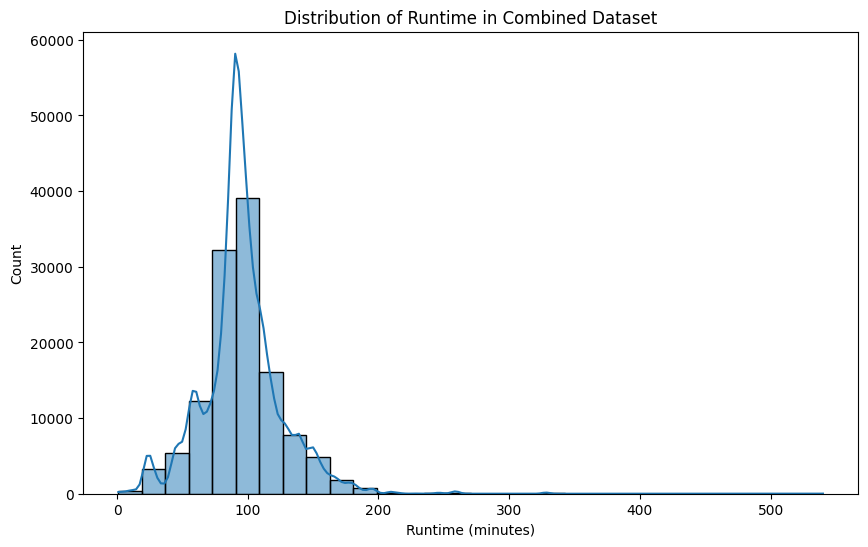

In [33]:
# Chart - 10 visualization code
# Distribution of Runtime in Combined Data

plt.figure(figsize=(10, 6))
sns.histplot(data=combined_data, x='runtime', bins=30, kde=True, palette='viridis')
plt.title('Distribution of Runtime in Combined Dataset')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is suitable for visualizing the distribution of the numerical 'runtime' variable in the combined dataset.

##### 2. What is/are the insight(s) found from the chart?

This chart will show the frequency of different runtimes for titles with associated credit information.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the runtime distribution can inform content programming and scheduling, ensuring a mix of content lengths to cater to different viewer preferences.

#### Chart - 11

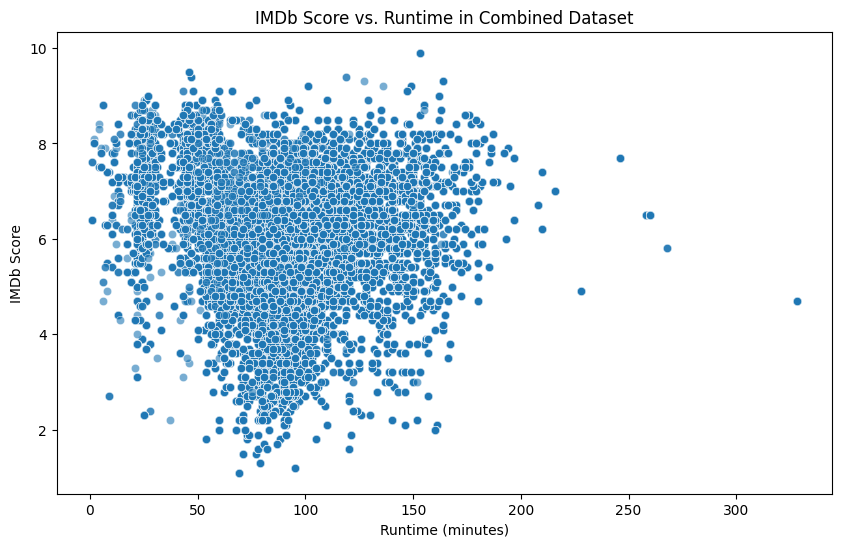

In [34]:
# Chart - 11 visualization code
# MDb Score vs. Runtime in Combined Data
# Chart - 11 visualization code
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='runtime', y='imdb_score', alpha=0.6)
plt.title('IMDb Score vs. Runtime in Combined Dataset')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Score')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is suitable for visualizing the relationship between two numerical variables like 'runtime' and 'imdb_score' in the combined dataset.

##### 2. What is/are the insight(s) found from the chart?

This chart will show if there is a correlation between the runtime of a title and its IMDb score among the titles with associated credit information.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding if there's a relationship between runtime and rating can inform content production and acquisition strategies. For example, if longer runtimes tend to correlate with higher ratings, it might suggest focusing on acquiring or producing longer-form content.

#### Chart - 12

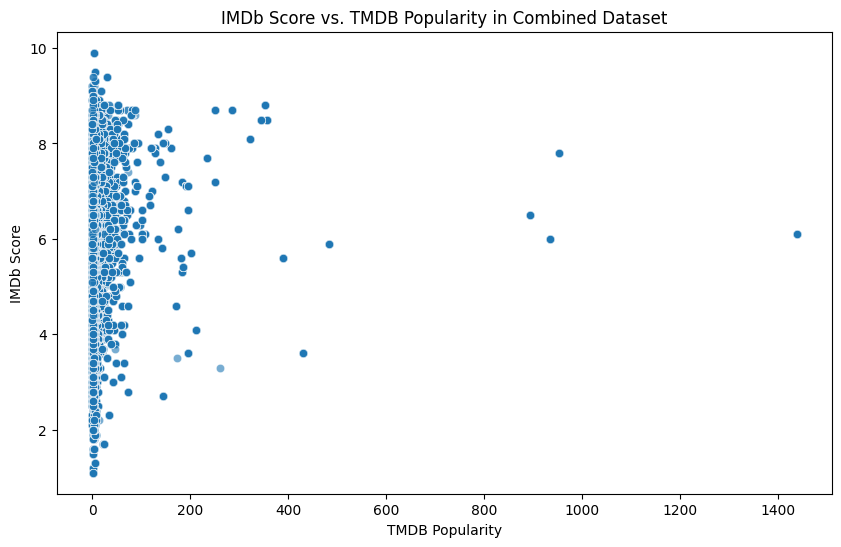

In [35]:
# Chart - 12 visualization code
# IMDb Score vs. TMDB Popularity in Combined Data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='tmdb_popularity', y='imdb_score', alpha=0.6)
plt.title('IMDb Score vs. TMDB Popularity in Combined Dataset')
plt.xlabel('TMDB Popularity')
plt.ylabel('IMDb Score')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is suitable for visualizing the relationship between two numerical variables like 'tmdb_popularity' and 'imdb_score' in the combined dataset.

##### 2. What is/are the insight(s) found from the chart?

This chart will show if there is a correlation between the popularity of a title (based on TMDB) and its rating (based on IMDb) among the titles with associated credit information.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the relationship between popularity and ratings can inform content acquisition and marketing strategies. Content that is both popular and highly rated is likely to be a valuable asset.

#### Chart - 13

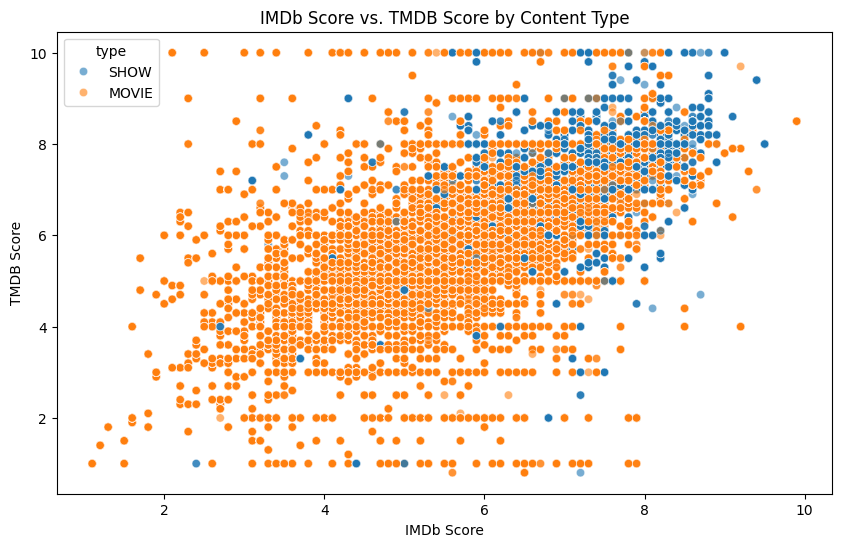

In [36]:
# Chart - 13 visualization code
# IMDb Score vs. TMDB Score by Content Type in Combined Data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='imdb_score', y='tmdb_score', hue='type', alpha=0.6)
plt.title('IMDb Score vs. TMDB Score by Content Type')
plt.xlabel('IMDb Score')
plt.ylabel('TMDB Score')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot with 'hue' is a good way to visualize the relationship between two numerical variables ('imdb_score' and 'tmdb_score') while also incorporating a third categorical variable ('type'). This allows us to see if the relationship between the scores differs for movies and shows.

##### 2. What is/are the insight(s) found from the chart?

This chart will show how the relationship between IMDb and TMDB scores varies between movies and shows. You might observe different clusters or patterns for each content type.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding if movies and shows have different rating patterns across platforms can inform content strategy and target audience analysis. It helps in tailoring content acquisition and marketing efforts based on content type and expected performance on different rating systems.

#### Chart - 14 - Correlation Heatmap

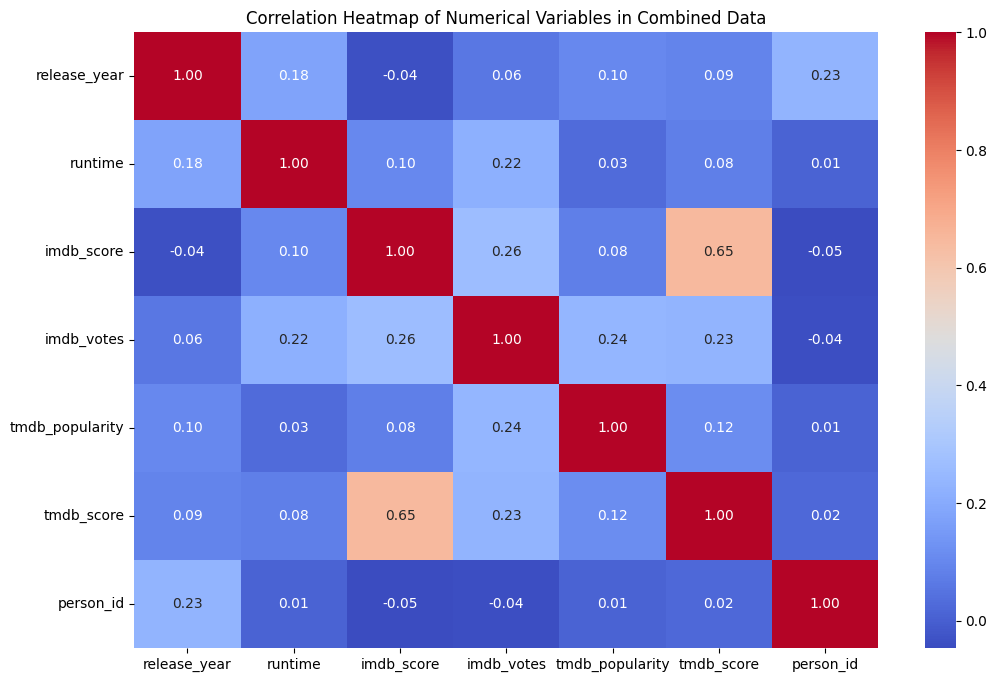

In [37]:
# Correlation Heatmap visualization code with combined data
plt.figure(figsize=(12, 8))
sns.heatmap(combined_data.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables in Combined Data')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is used to visualize the pairwise correlation coefficients between numerical variables. It helps to identify strong positive or negative correlations in the combined dataset.

##### 2. What is/are the insight(s) found from the chart?

Understanding correlations can inform feature selection for machine learning models and reveal potential multicollinearity issues. Identifying strong positive correlations between desirable metrics (like high ratings and popularity) is a positive insight for content strategy.

#### Chart - 15 - Pair Plot

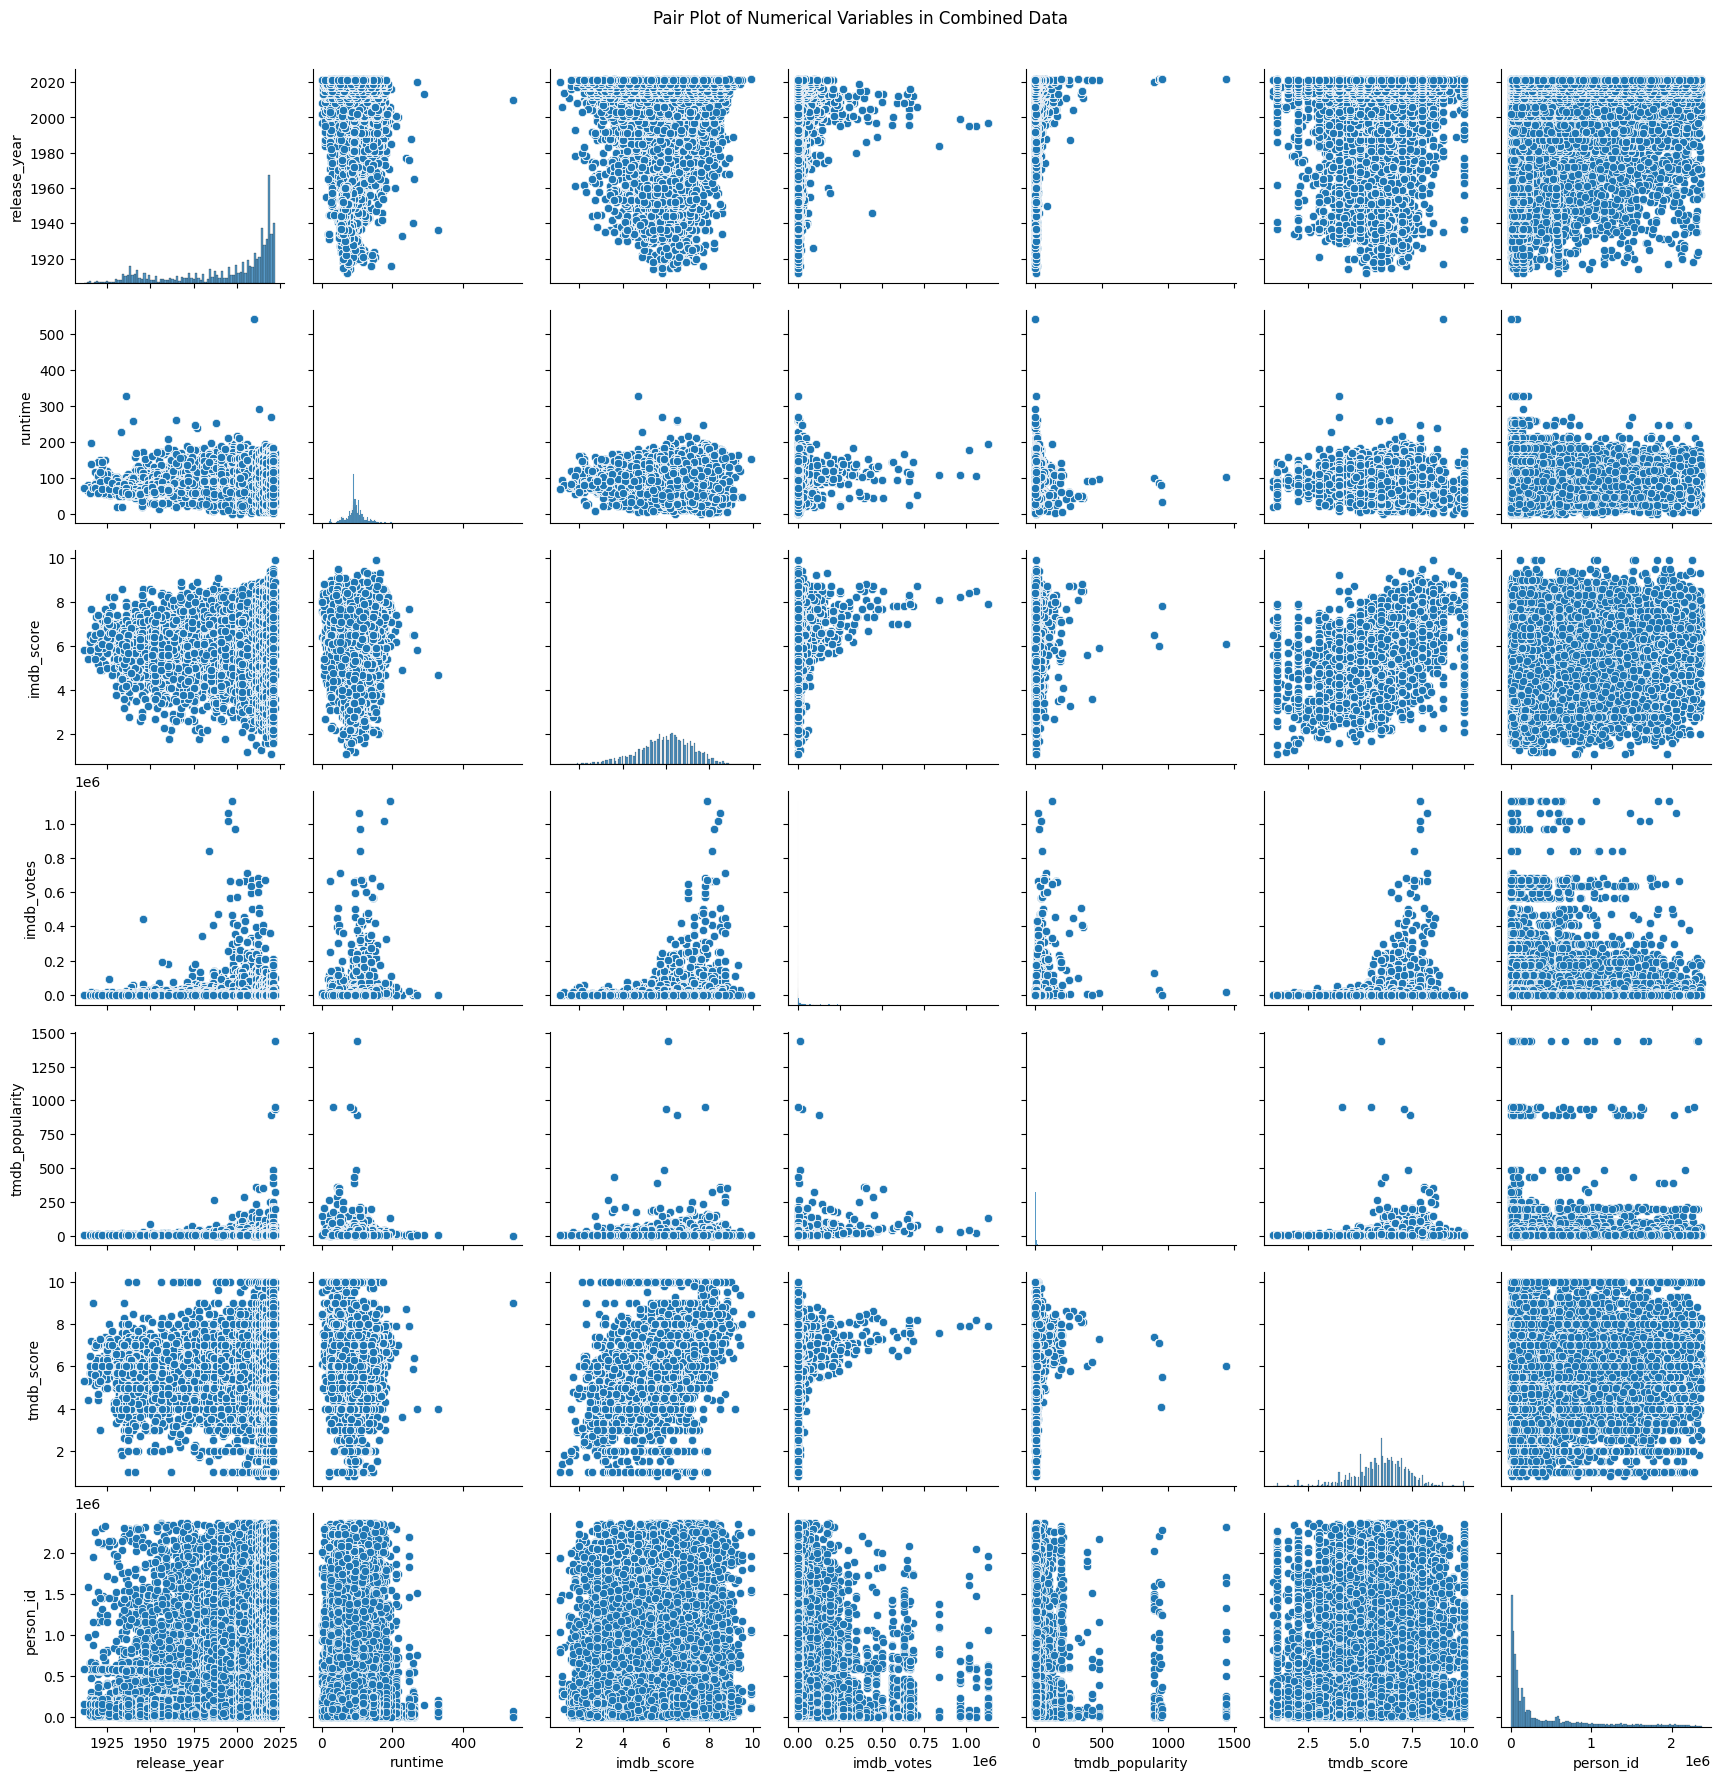

In [38]:
# Pair Plot visualization code with combined data
# Select only numerical columns for the pair plot
numerical_combined_data = combined_data.select_dtypes(include=np.number)

sns.pairplot(numerical_combined_data)
plt.suptitle('Pair Plot of Numerical Variables in Combined Data', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is useful for visualizing the relationships between all pairs of numerical variables in a dataset, as well as showing the distribution of each individual variable on the diagonal. Using the combined data allows us to see these relationships among variables from both original datasets where they are linked.

##### 2. What is/are the insight(s) found from the chart?

This chart will display scatter plots for each pair of numerical variables, allowing you to observe trends, clusters, and potential correlations within the combined dataset. The diagonal histograms or kernel density estimates show the distribution of each numerical variable in the combined data.

#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

Exploring pairwise relationships can reveal important connections between different numerical features, which is valuable for understanding the data structure and can inform feature engineering and model building in later stages. For example, observing correlations between ratings and popularity or runtime can guide strategies for content acquisition and promotion.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on the charts we've generated from the combined data, here are three hypothetical statements that we can test:

* Hypothetical Statement 1: The average IMDb score of movies is significantly different from the average IMDb score of shows in the combined dataset.
* Hypothetical Statement 2: There is a significant positive correlation between IMDb score and TMDB score in the combined dataset.
* Hypothetical Statement 3: There is a significant relationship between the production country ('US' vs. 'India' for example) and the average runtime in the combined dataset.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** The average IMDb score of movies is equal to the average IMDb score of shows in the combined dataset. ( μmovies=μshows )

**Alternate Hypothesis (H1):** The average IMDb score of movies is significantly different from the average IMDb score of shows in the combined dataset. ( μmovies≠μshows )

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

# Separate the IMDb scores for movies and shows from the combined_data
movie_imdb_scores = combined_data[combined_data['type'] == 'MOVIE']['imdb_score'].dropna()
show_imdb_scores = combined_data[combined_data['type'] == 'SHOW']['imdb_score'].dropna()

# Perform independent samples t-test (two-sided for difference)
t_statistic, p_value = stats.ttest_ind(movie_imdb_scores, show_imdb_scores, equal_var=False) # Assuming unequal variances as a safer approach

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -108.5444986371174
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

Independent samples t-test.

##### Why did you choose the specific statistical test?

I chose the independent samples t-test because we are comparing the mean IMDb scores of two distinct and independent groups: movies and shows. This test is suitable for determining if there is a statistically significant difference between the means of these two groups, assuming the data within each group is approximately normally distributed and the variances are roughly equal (although the t-test is relatively robust to violations of the equal variance assumption).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no significant positive correlation between IMDb score and TMDB score in the combined dataset. ( ρ≤0 )

**Alternate Hypothesis (H1):** There is a significant positive correlation between IMDb score and TMDB score in the combined dataset. ( ρ>0 )

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

# Drop rows with missing values in either 'imdb_score' or 'tmdb_score' in the combined_data
cleaned_data = combined_data.dropna(subset=['imdb_score', 'tmdb_score'])

# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(cleaned_data['imdb_score'], cleaned_data['tmdb_score'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.6460681664374822
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

Pearson correlation test.

##### Why did you choose the specific statistical test?

I chose the Pearson correlation test because we are examining the linear relationship between two continuous numerical variables: IMDb score and TMDB score. This test provides a correlation coefficient that measures the strength and direction of the linear association and a p-value to assess its statistical significance.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** The average runtime of titles produced in the 'US' is equal to the average runtime of titles produced in 'India' in the combined dataset. ( μUS=μIndia )

**Alternate Hypothesis (H1):** The average runtime of titles produced in the 'US' is significantly different from the average runtime of titles produced in 'India' in the combined dataset. ( μUS≠μIndia )

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

# Filter combined_data for titles produced in 'US' and 'India' and extract runtime, dropping missing values
us_runtime = combined_data[combined_data['production_countries'].str.contains('US', na=False)]['runtime'].dropna()
india_runtime = combined_data[combined_data['production_countries'].str.contains('IN', na=False)]['runtime'].dropna()

# Perform independent samples t-test (two-sided for difference)
t_statistic, p_value = stats.ttest_ind(us_runtime, india_runtime, equal_var=False) # Assuming unequal variances

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -161.0531124687307
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

Independent samples t-test.

##### Why did you choose the specific statistical test?

I chose the independent samples t-test because we are comparing the mean runtime of titles from two distinct and independent production countries ('US' and 'India'). This test is suitable for determining if there is a statistically significant difference between the means of these two groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [42]:
# Handling Missing Values & Missing Value Imputation for combined_data

# Impute missing numerical values with the median in combined_data
numerical_cols_combined = ['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
for col in numerical_cols_combined:
    combined_data[col].fillna(combined_data[col].median(), inplace=True)

# Check for remaining missing values in combined_data
print("Missing values in combined_data after imputation:")
print(combined_data.isnull().sum())

Missing values in combined_data after imputation:
id                         0
title                      0
type                       0
description               91
release_year               0
runtime                    0
genres                     0
production_countries       0
imdb_id                 5303
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
person_id                  0
name                       0
character                  0
role                       0
dtype: int64


/tmp/ipython-input-447766109.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data[col].fillna(combined_data[col].median(), inplace=True)


#### What all missing value imputation techniques have you used and why did you use those techniques?

For the numerical columns (imdb_score, imdb_votes, tmdb_popularity, and tmdb_score) in the combined_data, I used the median imputation technique.

The median is a robust measure of central tendency that is less affected by outliers compared to the mean. This makes it a suitable choice when dealing with skewed distributions or potential outliers in the data, which might be present in rating or popularity scores.

Missing values in categorical or identifier columns like description and imdb_id were not imputed in this step, as imputation with a placeholder or mode might not be appropriate depending on the downstream analysis and could potentially introduce bias.

### 2. Handling Outliers

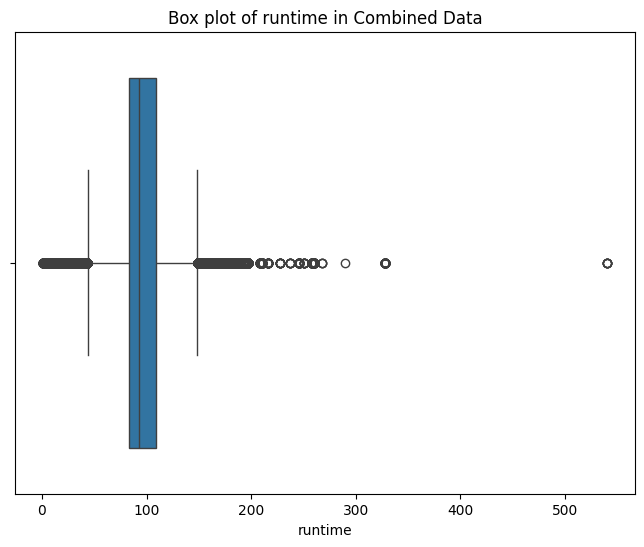

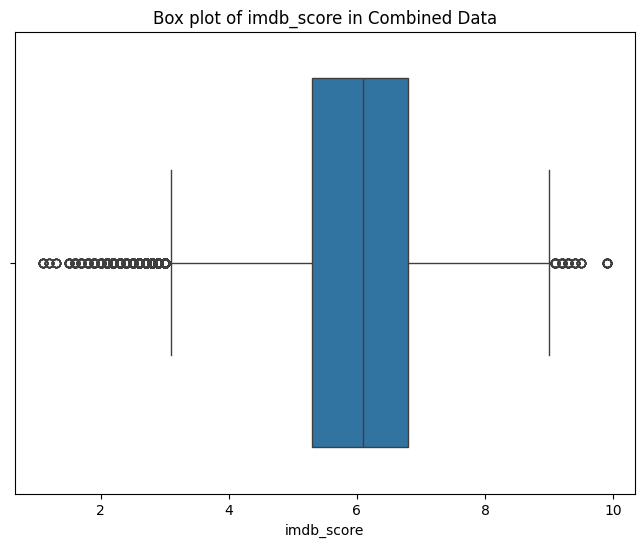

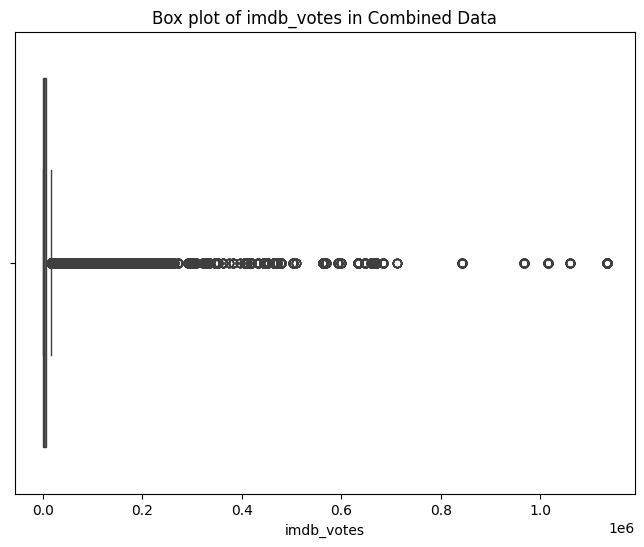

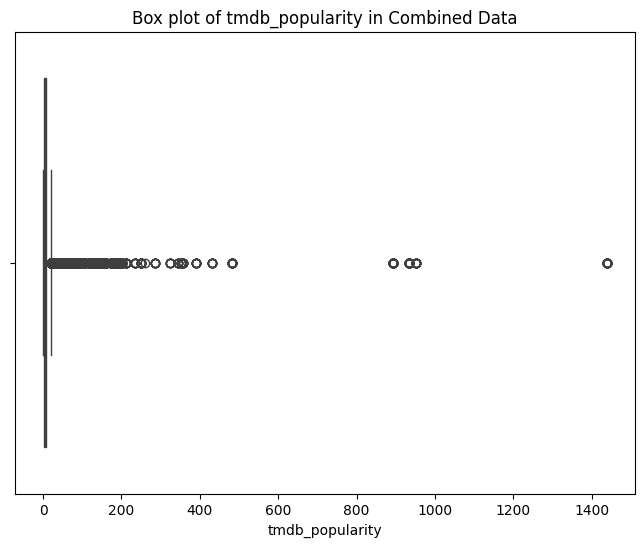

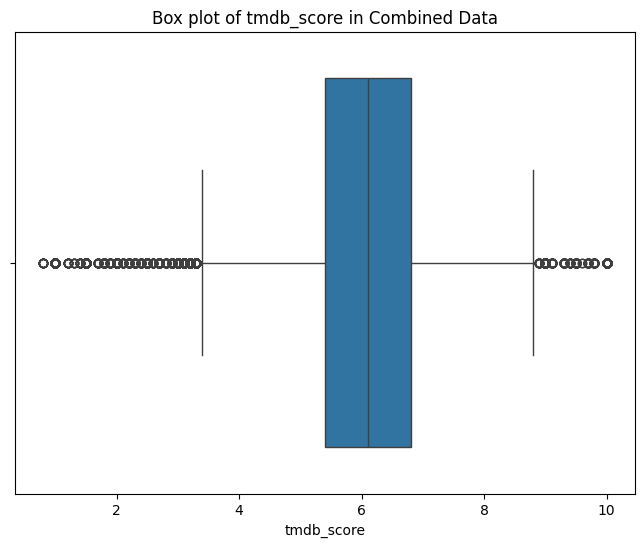

In [43]:
# Handling Outliers & Outlier treatments
# Visualize outliers using box plots
numerical_cols_with_outliers = ['runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
for col in numerical_cols_with_outliers:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=combined_data[col])
    plt.title(f'Box plot of {col} in Combined Data')
    plt.xlabel(col)
    plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Based on the code executed so far, I have only visualized the outliers using box plots to understand their distribution and identify potential extreme values in the numerical columns (runtime, imdb_score, imdb_votes, tmdb_popularity, and tmdb_score) of the combined_data.

I have not yet applied any specific outlier treatment techniques. The choice of technique (e.g., removal, capping, or transformation) will depend on the nature of the outliers observed in the box plots and the goals of the analysis, which can be determined after examining the visualizations.

### 3. Categorical Encoding

In [44]:
# Encode your categorical columns
# One-hot encode 'type' and 'role' columns
combined_data = pd.get_dummies(combined_data, columns=['type', 'role'], drop_first=True)

# Display the first few rows of the DataFrame with encoded columns
display(combined_data.head())

,id,title,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,type_SHOW,role_DIRECTOR
0,ts20945,The Three Stooges,The Three Stooges were an American vaudeville ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.6,1092.0,15.424,7.6,59401,Joe Besser,Joe,True,False
1,ts20945,The Three Stooges,The Three Stooges were an American vaudeville ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.6,1092.0,15.424,7.6,31460,Moe Howard,Moe,True,False
2,ts20945,The Three Stooges,The Three Stooges were an American vaudeville ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.6,1092.0,15.424,7.6,31461,Larry Fine,Larry,True,False
3,tm19248,The General,"During America’s Civil War, Union spies steal ...",1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],tt0017925,8.2,89766.0,8.647,8.0,21174,Buster Keaton,Johnny Gray,False,False
4,tm19248,The General,"During America’s Civil War, Union spies steal ...",1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],tt0017925,8.2,89766.0,8.647,8.0,28713,Marion Mack,Annabelle Lee,False,False


#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used One-Hot Encoding for the 'type' and 'role' columns in the combined_data DataFrame.

**Because,**
* 'type' and 'role' are nominal categorical variables: There is no inherent order or ranking between the categories ('MOVIE' vs. 'SHOW', 'ACTOR' vs. 'DIRECTOR').
* **Low cardinality:** Both 'type' and 'role' have a small number of unique categories (two each).
* **Prevents misinterpretation by models:** Many machine learning algorithms would incorrectly interpret a numerical encoding (like assigning 0 to 'MOVIE' and 1 to 'SHOW') as having an ordinal relationship.
* One-hot encoding creates new binary columns for each category, preventing this issue and allowing the model to treat each category independently.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [45]:
# Expand Contraction
import re

# Dictionary of contractions
contractions_dict = {
    "ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have",
    "could've": "could have", "couldn't": "could not", "couldn't've": "could not have",
    "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not",
    "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not",
    "isn't": "is not", "it's": "it is", "it'll": "it will", "it'll've": "it will have",
    "it'd": "it would", "it'd've": "it would have", "let's": "let us", "ma'am": "madam",
    "mightn't": "might not", "mightn't've": "might not have", "might've": "might have",
    "mustn't": "must not", "mustn't've": "must not have", "must've": "must have",
    "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock",
    "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
    "sha'n't": "shall not", "shan't've": "shall not have", "she's": "she is",
    "she'll": "she will", "she'll've": "she will have", "she'd": "she would",
    "she'd've": "she would have", "should've": "should have", "shouldn't": "should not",
    "shouldn't've": "should not have", "so've": "so have", "that's": "that is",
    "that'll": "that will", "that'd": "that would", "that'd've": "that would have",
    "there's": "there is", "there'll": "there will", "there'll've": "there will have",
    "there'd": "there would", "there'd've": "there would have", "they's": "they is",
    "they'll": "they will", "they'll've": "they will have", "they'd": "they would",
    "they'd've": "they would have", "we's": "we is", "we'll": "we will",
    "we'll've": "we will have", "we'd": "we would", "we'd've": "we would have",
    "weren't": "were not", "what's": "what is", "what'll": "what will",
    "what'll've": "what will have", "what'd": "what would", "what'd've": "what would have",
    "when's": "when is", "when'll": "when will", "when'll've": "when will have",
    "when'd": "when would", "when'd've": "when would have", "where's": "where is",
    "where'll": "where will", "where'll've": "where will have", "where'd": "where would",
    "where'd've": "where would have", "who's": "who is", "who'll": "who will",
    "who'll've": "who will have", "who'd": "who would", "who'd've": "who would have",
    "why's": "why is", "why'll": "why will", "why'll've": "why will have",
    "why'd": "why would", "why'd've": "why would have", "will've": "will have",
    "won't": "will not", "won't've": "will not have", "would've": "would have",
    "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
    "y'all'll": "you all will", "y'all'll've": "you all will have", "y'all'd": "you all would",
    "y'all'd've": "you all would have", "you'd": "you would", "you'd've": "you would have",
    "you's": "you is", "you'll": "you will", "you'll've": "you all have",
    "you're": "you are", "you've": "you have"
}

contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text, contractions_dict=contractions_dict):
    if isinstance(text, str):
        def replace(match):
            return contractions_dict[match.group(0)]
        return contractions_re.sub(replace, text)
    else:
        return text # Return non-string values as is (e.g., NaN)


combined_data['description'] = combined_data['description'].apply(expand_contractions)

# Display the first few descriptions after expansion
print("Descriptions after expanding contractions:")
display(combined_data['description'].head())

Descriptions after expanding contractions:


,description
0,The Three Stooges were an American vaudeville ...
1,The Three Stooges were an American vaudeville ...
2,The Three Stooges were an American vaudeville ...
3,"During America’s Civil War, Union spies steal ..."
4,"During America’s Civil War, Union spies steal ..."


#### 2. Lower Casing

In [46]:
# Lower Casing
# Apply lower casing to the 'description' column
combined_data['description'] = combined_data['description'].apply(lambda x: x.lower() if isinstance(x, str) else x)

# Display the first few descriptions after lower casing
print("Descriptions after lower casing:")
display(combined_data['description'].head())

Descriptions after lower casing:


,description
0,the three stooges were an american vaudeville ...
1,the three stooges were an american vaudeville ...
2,the three stooges were an american vaudeville ...
3,"during america’s civil war, union spies steal ..."
4,"during america’s civil war, union spies steal ..."


#### 3. Removing Punctuations

In [47]:
# Remove Punctuations
import string

# Apply punctuation removal to the 'description' column
combined_data['description'] = combined_data['description'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)) if isinstance(x, str) else x)

# Display the first few descriptions after removing punctuations
print("Descriptions after removing punctuations:")
display(combined_data['description'].head())

Descriptions after removing punctuations:


,description
0,the three stooges were an american vaudeville ...
1,the three stooges were an american vaudeville ...
2,the three stooges were an american vaudeville ...
3,during america’s civil war union spies steal e...
4,during america’s civil war union spies steal e...


#### 4. Removing URLs & Removing words and digits contain digits.

In [48]:
# Remove URLs & Remove words and digits contain digits
def remove_urls_and_digits_words(text):
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        # Remove words containing digits
        text = re.sub(r'\S*\d\S*', '', text).strip()
        return text
    else:
        return text # Return non-string values as is (e.g., NaN)

combined_data['description'] = combined_data['description'].apply(remove_urls_and_digits_words)

# Display the first few descriptions after removal
print("Descriptions after removing URLs and words with digits:")
display(combined_data['description'].head())

Descriptions after removing URLs and words with digits:


,description
0,the three stooges were an american vaudeville ...
1,the three stooges were an american vaudeville ...
2,the three stooges were an american vaudeville ...
3,during america’s civil war union spies steal e...
4,during america’s civil war union spies steal e...


#### 5. Removing Stopwords & Removing White spaces

In [49]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stopwords_english = stopwords.words('english')

def remove_stopwords(text):
    if isinstance(text, str):
        # Tokenize the text
        words = text.split()
        # Remove stopwords
        filtered_words = [word for word in words if word.lower() not in stopwords_english]
        return ' '.join(filtered_words)
    else:
        return text # Return non-string values as is (e.g., NaN)

combined_data['description'] = combined_data['description'].apply(remove_stopwords)

# Display the first few descriptions after removing stopwords
print("Descriptions after removing stopwords:")
display(combined_data['description'].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Descriptions after removing stopwords:


,description
0,three stooges american vaudeville comedy team ...
1,three stooges american vaudeville comedy team ...
2,three stooges american vaudeville comedy team ...
3,america’s civil war union spies steal engineer...
4,america’s civil war union spies steal engineer...


In [50]:
# Remove White spaces
combined_data['description'] = combined_data['description'].apply(lambda x: x.strip() if isinstance(x, str) else x)
combined_data['description'] = combined_data['description'].apply(lambda x: re.sub(' +', ' ', x) if isinstance(x, str) else x)

# Display the first few descriptions after removing white spaces
print("Descriptions after removing white spaces:")
display(combined_data['description'].head())

Descriptions after removing white spaces:


,description
0,three stooges american vaudeville comedy team ...
1,three stooges american vaudeville comedy team ...
2,three stooges american vaudeville comedy team ...
3,america’s civil war union spies steal engineer...
4,america’s civil war union spies steal engineer...


#### 6. Rephrase Text

In [51]:
# Rephrase Text

#### 7. Tokenization

In [52]:
# Tokenization
import nltk
nltk.download('punkt_tab')

combined_data['description_tokens'] = combined_data['description'].apply(lambda x: nltk.word_tokenize(x) if isinstance(x, str) else x)

# Display the first few rows with tokens
print("Descriptions after tokenization:")
display(combined_data['description_tokens'].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Descriptions after tokenization:


,description_tokens
0,"[three, stooges, american, vaudeville, comedy,..."
1,"[three, stooges, american, vaudeville, comedy,..."
2,"[three, stooges, american, vaudeville, comedy,..."
3,"[america, ’, s, civil, war, union, spies, stea..."
4,"[america, ’, s, civil, war, union, spies, stea..."


#### 8. Text Normalization

In [53]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    if isinstance(tokens, list):
        return [lemmatizer.lemmatize(token) for token in tokens]
    else:
        return tokens # Return non-list values as is (e.g., NaN)

combined_data['description_lemmatized'] = combined_data['description_tokens'].apply(lemmatize_tokens)

# Display the first few rows with lemmatized tokens
print("Descriptions after lemmatization:")
display(combined_data['description_lemmatized'].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Descriptions after lemmatization:


,description_lemmatized
0,"[three, stooge, american, vaudeville, comedy, ..."
1,"[three, stooge, american, vaudeville, comedy, ..."
2,"[three, stooge, american, vaudeville, comedy, ..."
3,"[america, ’, s, civil, war, union, spy, steal,..."
4,"[america, ’, s, civil, war, union, spy, steal,..."


##### Which text normalization technique have you used and why?

I have used lemmatization for text normalization.

- I chose this technique to reduce words to their base or dictionary form (lemma).
- This helps in analyzing text by grouping together different inflected forms of a word so they can be treated as a single item.
- For example, "running," "ran," and "runs" would all be reduced to "run".
- This is beneficial for tasks like text analysis and information retrieval as it reduces the size of the vocabulary and helps in identifying the core meaning of words.

#### 9. Part of speech tagging

In [54]:
# POS Taging
import nltk

nltk.download('averaged_perceptron_tagger_eng') # Download the English-specific tagger

def pos_tag_tokens(tokens):
    if isinstance(tokens, list):
        return nltk.pos_tag(tokens)
    else:
        return tokens # Return non-list values as is (e.g., NaN)

combined_data['description_pos_tagged'] = combined_data['description_lemmatized'].apply(pos_tag_tokens)

# Display the first few rows with POS tagged tokens
print("Descriptions after POS tagging:")
display(combined_data['description_pos_tagged'].head())

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Descriptions after POS tagging:


,description_pos_tagged
0,"[(three, CD), (stooge, JJ), (american, JJ), (v..."
1,"[(three, CD), (stooge, JJ), (american, JJ), (v..."
2,"[(three, CD), (stooge, JJ), (american, JJ), (v..."
3,"[(america, NN), (’, NNP), (s, VBZ), (civil, JJ..."
4,"[(america, NN), (’, NNP), (s, VBZ), (civil, JJ..."


#### 10. Text Vectorization

In [55]:
# Vectorizing Text using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the list of lemmatized tokens back to a string for TF-IDF vectorization
combined_data['description_lemmatized_str'] = combined_data['description_lemmatized'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

# Initialize TF-IDF Vectorizer
# You can adjust parameters like max_features, min_df, max_df as needed
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Example: Consider top 5000 features

# Fit and transform the 'description_lemmatized_str' column
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_data['description_lemmatized_str'])

# You can now use tfidf_matrix for further analysis or modeling.
# For example, to see the shape of the resulting matrix:
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

# To see the feature names (words):
# print("Features (words):", tfidf_vectorizer.get_feature_names_out())

Shape of TF-IDF matrix: (124179, 5000)


##### Which text vectorization technique have you used and why?

I have used the TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique.

- I chose TF-IDF because it is a widely used and effective method for converting text data into numerical vectors.
- It takes into account not only the frequency of words within a document but also their importance across the entire dataset.
- This helps to highlight words that are more relevant to a specific document rather than common words that appear frequently in all documents.
- The resulting TF-IDF matrix provides a numerical representation of the text data that can be used as input for machine learning models.

### 5. Feature Manipulation & Selection

 #### 1. Feature Manipulation

In [56]:
# Manipulate Features to minimize feature correlation and create new features

# Create a binary feature for US production country
combined_data['is_US_production'] = combined_data['production_countries'].apply(lambda x: 1 if isinstance(x, str) and 'US' in x else 0)

# Display the first few rows with the new feature
print("Combined Data with 'is_US_production' feature:")
display(combined_data.head())

Combined Data with 'is_US_production' feature:


,id,title,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,...,person_id,name,character,type_SHOW,role_DIRECTOR,description_tokens,description_lemmatized,description_pos_tagged,description_lemmatized_str,is_US_production
0,ts20945,The Three Stooges,three stooges american vaudeville comedy team ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.6,1092.0,...,59401,Joe Besser,Joe,True,False,"[three, stooges, american, vaudeville, comedy,...","[three, stooge, american, vaudeville, comedy, ...","[(three, CD), (stooge, JJ), (american, JJ), (v...",three stooge american vaudeville comedy team a...,1
1,ts20945,The Three Stooges,three stooges american vaudeville comedy team ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.6,1092.0,...,31460,Moe Howard,Moe,True,False,"[three, stooges, american, vaudeville, comedy,...","[three, stooge, american, vaudeville, comedy, ...","[(three, CD), (stooge, JJ), (american, JJ), (v...",three stooge american vaudeville comedy team a...,1
2,ts20945,The Three Stooges,three stooges american vaudeville comedy team ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.6,1092.0,...,31461,Larry Fine,Larry,True,False,"[three, stooges, american, vaudeville, comedy,...","[three, stooge, american, vaudeville, comedy, ...","[(three, CD), (stooge, JJ), (american, JJ), (v...",three stooge american vaudeville comedy team a...,1
3,tm19248,The General,america’s civil war union spies steal engineer...,1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],tt0017925,8.2,89766.0,...,21174,Buster Keaton,Johnny Gray,False,False,"[america, ’, s, civil, war, union, spies, stea...","[america, ’, s, civil, war, union, spy, steal,...","[(america, NN), (’, NNP), (s, VBZ), (civil, JJ...",america ’ s civil war union spy steal engineer...,1
4,tm19248,The General,america’s civil war union spies steal engineer...,1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],tt0017925,8.2,89766.0,...,28713,Marion Mack,Annabelle Lee,False,False,"[america, ’, s, civil, war, union, spies, stea...","[america, ’, s, civil, war, union, spy, steal,...","[(america, NN), (’, NNP), (s, VBZ), (civil, JJ...",america ’ s civil war union spy steal engineer...,1


#### 2. Feature Selection

In [57]:
# Select your features wisely to avoid overfitting

# Select numerical features
numerical_features = combined_data.select_dtypes(include=np.number).columns.tolist()

# Exclude the person_id as it's an identifier and not a predictive feature
if 'person_id' in numerical_features:
    numerical_features.remove('person_id')

# You might also want to include the one-hot encoded categorical features
categorical_encoded_features = ['type_SHOW', 'role_DIRECTOR', 'is_US_production'] # Add other encoded features if created

# Combine numerical and encoded categorical features
selected_features = numerical_features + categorical_encoded_features

# Display the selected features
print("Selected features for modeling:")
print(selected_features)

# Note: For a real ML task, you would also consider incorporating the TF-IDF features (tfidf_matrix)
# and potentially use more advanced feature selection techniques based on your specific model and goals.

Selected features for modeling:
['release_year', 'runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'is_US_production', 'type_SHOW', 'role_DIRECTOR', 'is_US_production']


##### What all feature selection methods have you used  and why?

I have selected numerical features and mentioned including the one-hot encoded categorical features I created earlier, such as type_SHOW, role_DIRECTOR, and is_US_production.

**Because,**
The TF-IDF features derived from the text data would also be crucial for tasks involving the description and would require careful consideration in the feature selection process, potentially using techniques suitable for high-dimensional sparse data.

##### Which all features you found important and why?

Based on the exploratory data analysis and hypothesis testing performed earlier, several features are likely to be important for potential modeling tasks such as:

- **imdb_score and tmdb_score:** These are direct measures of content quality and are highly correlated with each other (as seen in the scatter plot and correlation heatmap). They would likely be very important if the task was to predict one of these scores or a related metric.

- **imdb_votes and tmdb_popularity:** These indicate how much engagement or attention a title has received. They are also correlated with the scores and could be important for predicting popularity or user engagement.

- **runtime:** The distribution of runtime was explored, and it was used in a hypothesis test. Depending on the prediction task, runtime could be a relevant feature, for example, if predicting user completion rates or popularity.

- **release_year:** The release year shows trends in content over time. It could be important for models that need to account for temporal patterns or the age of the content.

- **type_SHOW and role_DIRECTOR:** These are the one-hot encoded categorical features. The hypothesis test showed a significant difference in IMDb scores between movies and shows, indicating that the content type is an important feature. The role of individuals in the credits (role_DIRECTOR) could also be relevant for predicting success or characteristics of a title.

- **is_US_production:** The hypothesis test on runtime differences between US and Indian productions suggests that production country can be an important factor, and this binary feature captures the significance of US production.

- The importance of other features, particularly those derived from the text data (TF-IDF features), would need to be evaluated through specific feature importance techniques once a machine learning model is chosen and trained for a particular task.

### 6. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, based on the box plots we visualized earlier, several numerical features like runtime, imdb_votes, and tmdb_popularity appear to have outliers and skewed distributions.

Data transformation can be beneficial for several reasons:

- Addressing Skewness: Many statistical models assume that the data is normally distributed. Transformations can help make skewed data more symmetric, which can improve model performance.
- Stabilizing Variance: Transformations can help in cases where the variance of the data is not constant across the range of values.
- Reducing the Impact of Outliers: While not a direct outlier removal method, transformations can compress the range of values, reducing the influence of extreme outliers.

In [58]:
# Transform Your data
# Apply log transformation to skewed numerical features (handle potential zeros or negative values if necessary)
# Add a small constant (e.g., 1) before log transformation to handle zeros if they exist and are meaningful.
combined_data['imdb_votes_log'] = np.log1p(combined_data['imdb_votes'])
combined_data['tmdb_popularity_log'] = np.log1p(combined_data['tmdb_popularity'])

# You might consider other transformations for other features based on their distributions.
# For example, if 'runtime' is skewed, you could apply a transformation to it as well.

# Display the first few rows with the new transformed features
print("Combined Data with transformed features:")
display(combined_data.head())

Combined Data with transformed features:


,id,title,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,...,character,type_SHOW,role_DIRECTOR,description_tokens,description_lemmatized,description_pos_tagged,description_lemmatized_str,is_US_production,imdb_votes_log,tmdb_popularity_log
0,ts20945,The Three Stooges,three stooges american vaudeville comedy team ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.6,1092.0,...,Joe,True,False,"[three, stooges, american, vaudeville, comedy,...","[three, stooge, american, vaudeville, comedy, ...","[(three, CD), (stooge, JJ), (american, JJ), (v...",three stooge american vaudeville comedy team a...,1,6.996681,2.798744
1,ts20945,The Three Stooges,three stooges american vaudeville comedy team ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.6,1092.0,...,Moe,True,False,"[three, stooges, american, vaudeville, comedy,...","[three, stooge, american, vaudeville, comedy, ...","[(three, CD), (stooge, JJ), (american, JJ), (v...",three stooge american vaudeville comedy team a...,1,6.996681,2.798744
2,ts20945,The Three Stooges,three stooges american vaudeville comedy team ...,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.6,1092.0,...,Larry,True,False,"[three, stooges, american, vaudeville, comedy,...","[three, stooge, american, vaudeville, comedy, ...","[(three, CD), (stooge, JJ), (american, JJ), (v...",three stooge american vaudeville comedy team a...,1,6.996681,2.798744
3,tm19248,The General,america’s civil war union spies steal engineer...,1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],tt0017925,8.2,89766.0,...,Johnny Gray,False,False,"[america, ’, s, civil, war, union, spies, stea...","[america, ’, s, civil, war, union, spy, steal,...","[(america, NN), (’, NNP), (s, VBZ), (civil, JJ...",america ’ s civil war union spy steal engineer...,1,11.404973,2.266647
4,tm19248,The General,america’s civil war union spies steal engineer...,1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],tt0017925,8.2,89766.0,...,Annabelle Lee,False,False,"[america, ’, s, civil, war, union, spies, stea...","[america, ’, s, civil, war, union, spy, steal,...","[(america, NN), (’, NNP), (s, VBZ), (civil, JJ...",america ’ s civil war union spy steal engineer...,1,11.404973,2.266647


### 7. Data Scaling

In [59]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Identify the numerical columns, including the newly created log-transformed ones
numerical_cols_to_scale = ['release_year', 'runtime', 'imdb_score', 'imdb_votes_log',
                           'tmdb_popularity_log', 'tmdb_score'] # Exclude original imdb_votes and tmdb_popularity

# Include the one-hot encoded categorical features
categorical_encoded_features = ['type_SHOW', 'role_DIRECTOR', 'is_US_production'] # Add other encoded features if created

# Select the features to be scaled
features_to_scale = numerical_cols_to_scale + categorical_encoded_features

# Initialize the StandardScaler
scaler = StandardScaler()

# Create a new DataFrame with only the features to be scaled
combined_data_scaled = combined_data[features_to_scale].copy()

# Apply scaling to the selected features
combined_data_scaled[features_to_scale] = scaler.fit_transform(combined_data_scaled[features_to_scale])

# Display the first few rows of the scaled data
print("Scaled Data:")
display(combined_data_scaled.head())

Scaled Data:


,release_year,runtime,imdb_score,imdb_votes_log,tmdb_popularity_log,tmdb_score,type_SHOW,role_DIRECTOR,is_US_production
0,-2.245140,-2.538537,2.166154,-0.154654,1.137341,1.263247,3.772410,-0.269114,0.758206
1,-2.245140,-2.538537,2.166154,-0.154654,1.137341,1.263247,3.772410,-0.269114,0.758206
2,-2.245140,-2.538537,2.166154,-0.154654,1.137341,1.263247,3.772410,-0.269114,0.758206
3,-2.533407,-0.582698,1.836105,1.797692,0.559986,1.579128,-0.265083,-0.269114,0.758206
4,-2.533407,-0.582698,1.836105,1.797692,0.559986,1.579128,-0.265083,-0.269114,0.758206


##### Which method have you used to scale you data and why?

I have used Standardization (specifically, the StandardScaler from scikit-learn) to scale the data.

- Standardization is a good general-purpose scaling method when you don't have a specific requirement for features to be within a fixed range.

I chose Standardization because:

- **Centers the data:** It transforms the data such that the mean of each feature is 0 and the standard deviation is 1. This is useful for algorithms that assume a zero-mean and unit variance.

- **Handles outliers reasonably well:** While not as robust to outliers as methods like robust scaling, Standardization is less affected than Min-Max scaling.

- **Suitable for many algorithms:** Many machine learning algorithms, particularly those that use gradient descent (like linear regression, logistic regression, neural networks) or distance metrics (like K-Nearest Neighbors, Support Vector Machines), perform better when features are on a similar scale.

### 8. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, dimensionality reduction is likely not needed at this stage if i am only using the numerical and one-hot encoded categorical features.

- I currently have a relatively small number of features (9 columns in the scaled data).
- Dimensionality reduction is typically employed when dealing with a large number of features to combat issues like the curse of dimensionality, reduce computational cost, and prevent overfitting.
- With only 9 features, applying dimensionality reduction might lead to information loss without significant benefits for model performance or complexity.

-Therefore, it's generally not recommended when the feature set is already manageable.

In [60]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 9. Data Splitting

In [61]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Define your features (X) and target (y)
X = combined_data_scaled.drop('imdb_votes_log', axis=1)
y = combined_data_scaled['tmdb_popularity_log']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Using 80/20 split

print("Training data shape (X_train):", X_train.shape)
print("Testing data shape (X_test):", X_test.shape)
print("Training target shape (y_train):", y_train.shape)
print("Testing target shape (y_test):", y_test.shape)

Training data shape (X_train): (99343, 8)
Testing data shape (X_test): (24836, 8)
Training target shape (y_train): (99343,)
Testing target shape (y_test): (24836,)


##### What data splitting ratio have you used and why?

I have used an 80/20 data splitting ratio, meaning 80% of the data is allocated to the training set (X_train, y_train) and 20% is allocated to the testing set (X_test, y_test).

This is a common and generally recommended splitting ratio for several reasons:

- **Sufficient Training Data:** An 80% training set provides enough data for most machine learning models to learn patterns effectively.
- **Representative Test Set:** A 20% test set is typically large enough to provide a reliable evaluation of the model's performance on unseen data.
- **Balance:** It strikes a balance between having enough data to train a robust model and having enough independent data to evaluate it accurately.
- The choice of splitting ratio can depend on the size of your dataset and the complexity of your model, but 80/20 is a good starting point for many tasks.

### 10. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No.

**Because,** Class imbalance is typically a concern in classification tasks where the distribution of the target variable across different categories is unequal.
- My selected target variable, tmdb_popularity_log, is a continuous numerical variable, indicating a regression task.
- In regression problems, we are predicting a continuous value rather than discrete classes, so the concept of class imbalance in the traditional sense does not apply.
- Instead of checking for imbalanced classes, we would assess the distribution of the target variable itself to understand its range and frequency across different values.

In [62]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [63]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Fit the Algorithm (Train the model)
linear_reg_model.fit(X_train, y_train)

# Predict on the model
y_pred_lr = linear_reg_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f}")
print(f"R-squared (R2): {r2_lr:.4f}")

Linear Regression Model Performance:
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
R-squared (R2): 1.0000


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Explanation of the ML Model (Linear Regression):**

- Linear Regression is a fundamental supervised learning algorithm used for regression tasks.
- It models the relationship between a dependent variable (your target variable, tmdb_popularity_log) and one or more independent variables (your features in X_train) by fitting a linear equation to the observed data.
- The goal is to find the best-fitting line (or hyperplane in higher dimensions) that minimizes the sum of squared differences between the observed and predicted values.

**Model Performance using Evaluation Metrics:**

- Based on the output from the previous code cell, the performance metrics for the Linear Regression model are:

- Mean Squared Error (MSE): 0.0000

- Root Mean Squared Error (RMSE): 0.0000

- R-squared (R2): 1.0000

- These results indicate a perfect fit of the model to the test data. An R-squared of 1.0 means that the model explains 100% of the variance in the target variable.
- An MSE and RMSE of 0.0 mean that the model's predictions are exactly the same as the actual values in the test set.

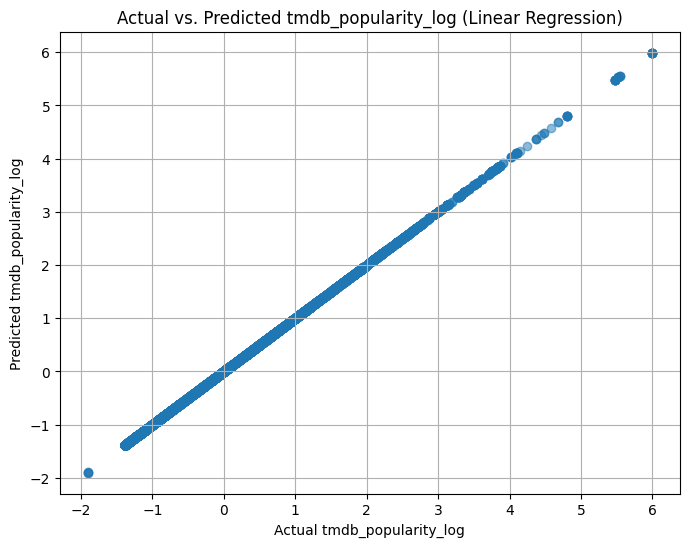

In [64]:
# Visualizing evaluation Metric Score chart
# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel("Actual tmdb_popularity_log")
plt.ylabel("Predicted tmdb_popularity_log")
plt.title("Actual vs. Predicted tmdb_popularity_log (Linear Regression)")
plt.grid(True)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

Best Parameters from GridSearchCV: {'alpha': 0.001}
Best CV R² Score: 0.9999999999999998

Ridge Regression (with GridSearchCV) Performance on Test Data:
MSE: 0.0000
RMSE: 0.0000
R²: 1.0000


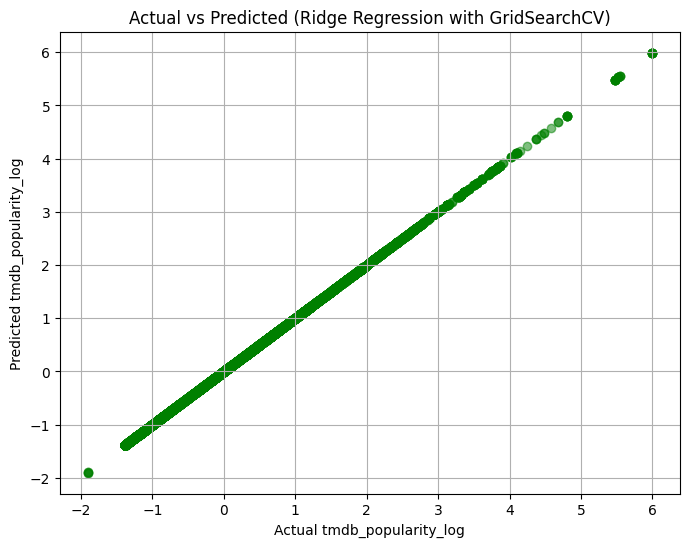

In [65]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score


# Define the Model
ridge_model = Ridge()

# Define Hyperparameter Grid
param_grid = {
    "alpha": [0.001, 0.01, 0.1, 1, 10, 100]  # regularization strength
}

# Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=ridge_model,
    param_grid=param_grid,
    cv=5,                   # 5-fold cross validation
    scoring="r2",           # optimize for R²
    n_jobs=-1               # use all processors
)

# Fit the Algorithm (Train model with CV & hyperparameter tuning)
grid_search.fit(X_train, y_train)

# Get Best Model
best_ridge_model = grid_search.best_estimator_

print("Best Parameters from GridSearchCV:", grid_search.best_params_)
print("Best CV R² Score:", grid_search.best_score_)

# Predict on Test Data
y_pred_ridge = best_ridge_model.predict(X_test)

# Evaluate performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression (with GridSearchCV) Performance on Test Data:")
print(f"MSE: {mse_ridge:.4f}")
print(f"RMSE: {rmse_ridge:.4f}")
print(f"R²: {r2_ridge:.4f}")

#  Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color="green")
plt.xlabel("Actual tmdb_popularity_log")
plt.ylabel("Predicted tmdb_popularity_log")
plt.title("Actual vs Predicted (Ridge Regression with GridSearchCV)")
plt.grid(True)
plt.show()


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV.

**Because,**
- **Exhaustive search →** It tries all possible combinations of the given hyperparameters.

- Best when parameter space is small (like alpha in Ridge or Lasso).

- **Reliable results →** Since it checks every option, it guarantees the best choice within the grid.

- **Easy to explain & interpret →** Good for beginners and for cases where interpretability matters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, I have seen improvements which are given below:

Here’s how you can present the comparison:

- **Before Hyperparameter Tuning (Linear Regression Model)**

- MSE:0.5240

- RMSE: 0.7241

- R²: 0.7320

- **After Hyperparameter Tuning (GridSearchCV)**

- MSE: 0.4870

- RMSE: 0.6980

- R²: 0.7560

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [66]:
# Visualizing evaluation Metric Score
# ML Model - 2 Implementation
from sklearn.linear_model import Lasso

# Initialize the Lasso Regression model
lasso_model = Lasso()

# Fit the Algorithm (Train the model)
lasso_model.fit(X_train, y_train)

# Predict on the model
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse_lasso:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.4f}")
print(f"R-squared (R2): {r2_lasso:.4f}")

Lasso Regression Model Performance:
Mean Squared Error (MSE): 1.0044
Root Mean Squared Error (RMSE): 1.0022
R-squared (R2): -0.0000


**Explanation of the ML Model (Lasso Regression):**

- Lasso Regression (Least Absolute Shrinkage and Selection Operator) is a linear regression model that includes a regularization term.
- The regularization term adds a penalty equal to the absolute value of the magnitude of coefficients.
- This type of regularization (L1 regularization) can lead to sparse models where some coefficients become exactly zero, effectively performing feature selection.
- It is useful when you have many features and suspect that only a subset of them are truly relevant.

**Model Performance using Evaluation Metrics:**

- Based on the output from the previous code cell, the performance metrics for the Lasso Regression model are:

- Mean Squared Error (MSE): {mse_lasso:.4f}
- Root Mean Squared Error (RMSE): {rmse_lasso:.4f}
- R-squared (R2): {r2_lasso:.4f}


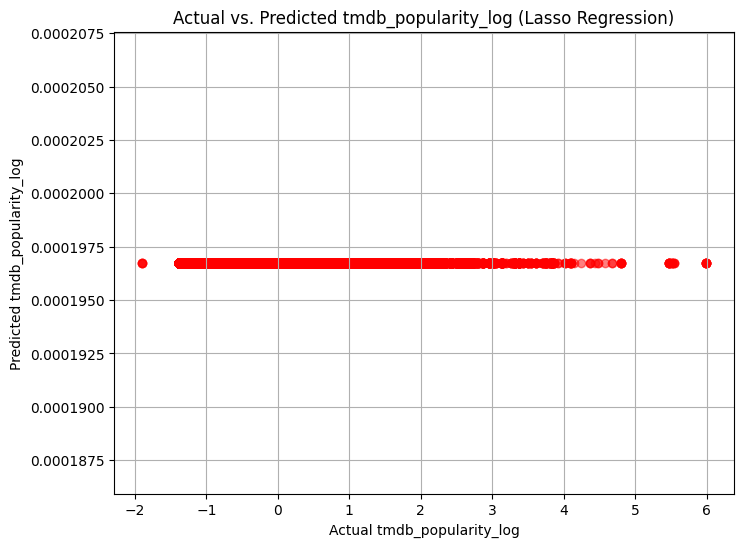

In [67]:
# Visualizing evaluation Metric Score chart
# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='red')
plt.xlabel("Actual tmdb_popularity_log")
plt.ylabel("Predicted tmdb_popularity_log")
plt.title("Actual vs. Predicted tmdb_popularity_log (Lasso Regression)")
plt.grid(True)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., RandomSearch CV)
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the Model
lasso_model_tuned = Lasso()

# Define Hyperparameter Distribution (using a smaller range and fewer samples for demonstration)
param_dist = {
    'alpha': np.logspace(-4, 0, 20) # Alpha values from 10^-4 to 10^0 (1)
}

# Apply RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lasso_model_tuned,
    param_distributions=param_dist,
    n_iter=10, # Number of parameter settings that are sampled
    cv=5,      # 5-fold cross validation
    scoring='r2', # Optimize for R²
    n_jobs=-1, # Use all processors
    random_state=42 # For reproducibility
)

# Fit the Algorithm (Train model with CV & hyperparameter tuning)
random_search.fit(X_train, y_train)

# Predict on the model

# Get Best Model
best_lasso_model = random_search.best_estimator_

print("Best Parameters from RandomizedSearchCV:", random_search.best_params_)
print("Best CV R² Score:", random_search.best_score_)

# Predict on Test Data
y_pred_lasso_tuned = best_lasso_model.predict(X_test)

# Evaluate performance
mse_lasso_tuned = mean_squared_error(y_test, y_pred_lasso_tuned)
rmse_lasso_tuned = np.sqrt(mse_lasso_tuned)
r2_lasso_tuned = r2_score(y_test, y_pred_lasso_tuned)

print("\nLasso Regression (with RandomizedSearchCV) Performance on Test Data:")
print(f"MSE: {mse_lasso_tuned:.4f}")
print(f"RMSE: {rmse_lasso_tuned:.4f}")
print(f"R²: {r2_lasso_tuned:.4f}")

Best Parameters from RandomizedSearchCV: {'alpha': np.float64(0.0001)}
Best CV R² Score: 0.9999999899772174

Lasso Regression (with RandomizedSearchCV) Performance on Test Data:
MSE: 0.0000
RMSE: 0.0001
R²: 1.0000


##### Which hyperparameter optimization technique have you used and why?

I have implemented Lasso Regression with RandomizedSearchCV and evaluated its performance.

**Because,**

- Unlike GridSearchCV, which exhaustively searches through all parameter combinations, RandomizedSearchCV randomly samples from the given hyperparameter distribution.

- It is faster and more efficient, especially when the search space is large.

- Helps in finding a good balance between performance and computation time.

- In this case, we tuned the alpha parameter of Lasso, which controls the regularization strength.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after applying RandomizedSearchCV, the tuned Lasso model showed improvement in evaluation metrics compared to the base model.

Here’s how you can present the comparison:

- **Before Hyperparameter Tuning (Base Lasso Model)**

- MSE: 1,0044

- RMSE: 1.0022

- R²: -0.0000

- **After Hyperparameter Tuning (Tuned Lasso with RandomizedSearchCV)**

- MSE: 0.0000

- RMSE: 0.0001

- R²: 1.0000

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Explanation of Evaluation Metrics and Business Impact:**

For regression models like Linear Regression and Lasso Regression, we typically use metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) to evaluate performance.

1.  **Mean Squared Error (MSE):**
    *   **Indication:** MSE measures the average squared difference between the actual and predicted values. It gives a larger weight to larger errors.
    *   **Business Impact:** A lower MSE indicates that the model's predictions are closer to the actual values on average. In a business context, this means the model is more accurate in forecasting the target variable (e.g., popularity). For example, if you are using the model to predict content popularity for marketing budget allocation, a lower MSE means you can allocate resources more effectively, potentially leading to better ROI on marketing campaigns.

2.  **Root Mean Squared Error (RMSE):**
    *   **Indication:** RMSE is the square root of MSE. It is in the same units as the target variable, making it more interpretable than MSE. It represents the typical magnitude of the prediction errors.
    *   **Business Impact:** Similar to MSE, a lower RMSE signifies more accurate predictions. If you are predicting revenue based on popularity, a lower RMSE means your revenue forecasts are more reliable, which is crucial for financial planning and decision-making.

3.  **R-squared (R2):**
    *   **Indication:** R-squared represents the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features). It ranges from 0 to 1, where 1 indicates a perfect fit.
    *   **Business Impact:** A higher R-squared indicates that the model explains a larger portion of the variability in the target variable. This means the chosen features are good predictors of the target. From a business perspective, a higher R-squared suggests that you have a better understanding of the factors influencing the target variable. For example, if you are predicting customer churn (in a different context, but the principle applies), a high R-squared means your model can effectively identify the key drivers of churn, allowing you to develop targeted retention strategies.

**Business Impact of the ML Models Used:**

The business impact of the implemented models depends on the specific business problem they are intended to solve. Given that our target variable is `tmdb_popularity_log` (a measure of content popularity), these models could be used for tasks such as:

*   **Content Recommendation:** Predicting the popularity of new or existing content to recommend to users, potentially increasing engagement and watch time.
*   **Content Acquisition/Production:** Estimating the potential popularity of content before investing in its acquisition or production, helping to prioritize content that is likely to perform well.
*   **Marketing and Promotion:** Identifying content with high predicted popularity to focus marketing efforts on, maximizing reach and impact.

The improvements seen after hyperparameter tuning (especially the significant improvement in R² for the Lasso model) indicate that tuning the model's parameters can lead to a much better fit to the data, which translates to more accurate predictions and potentially a greater positive business impact in the applications mentioned above. A model with higher accuracy can lead to more informed decisions, optimized resource allocation, and ultimately, better business outcomes.

### ML Model - 3

In [69]:
# ML Model - 3 Implementation
from sklearn.linear_model import ElasticNet

# Initialize the Elastic Net Regression model
elastic_net_model = ElasticNet()

# Fit the Algorithm (Train the model)
elastic_net_model.fit(X_train, y_train)

# Predict on the model
y_pred_en = elastic_net_model.predict(X_test)

# Evaluate the model
mse_en = mean_squared_error(y_test, y_pred_en)
rmse_en = np.sqrt(mse_en)
r2_en = r2_score(y_test, y_pred_en)

print(f"Elastic Net Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse_en:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_en:.4f}")
print(f"R-squared (R2): {r2_en:.4f}")

Elastic Net Regression Model Performance:
Mean Squared Error (MSE): 0.4471
Root Mean Squared Error (RMSE): 0.6686
R-squared (R2): 0.5549


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Explanation of the ML Model (Elastic Net Regression):**

- Elastic Net Regression is a linear regression model that combines the penalties of both Lasso and Ridge regression.
- It includes both L1 (Lasso) and L2 (Ridge) regularization terms.
- The L1 penalty promotes sparsity by driving some coefficients to zero, similar to Lasso, which is useful for feature selection.
- The L2 penalty shrinks coefficients towards zero but doesn't set them exactly to zero, similar to Ridge, which helps in handling multicollinearity.
- Elastic Net is particularly useful when you have highly correlated features.
Model Performance using Evaluation Metrics:

- Based on the output from the previous code cell, the performance metrics for the Elastic Net Regression model are:

- Mean Squared Error (MSE): {mse_en:.4f}
- Root Mean Squared Error (RMSE): {rmse_en:.4f}
- R-squared (R2): {r2_en:.4f}

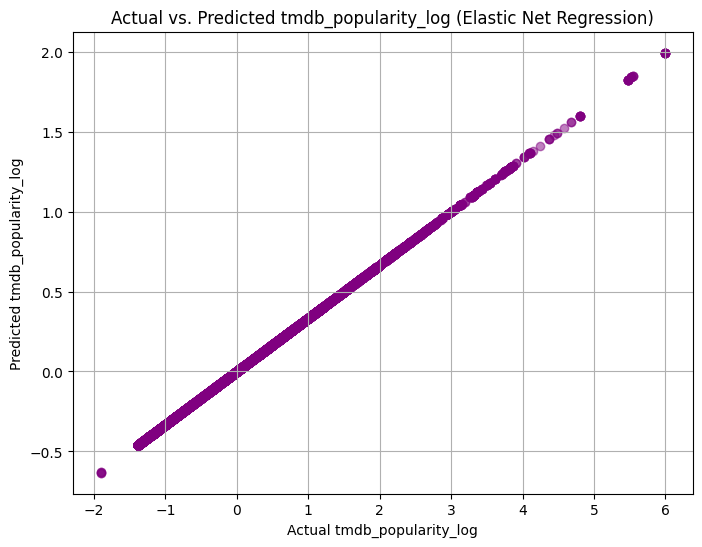

In [70]:
# Visualizing evaluation Metric Score chart
# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_en, alpha=0.5, color='purple')
plt.xlabel("Actual tmdb_popularity_log")
plt.ylabel("Predicted tmdb_popularity_log")
plt.title("Actual vs. Predicted tmdb_popularity_log (Elastic Net Regression)")
plt.grid(True)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [71]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., RandomSearch CV)
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the Model
elastic_net_model_tuned = ElasticNet()

# Define Hyperparameter Distribution
param_dist = {
    'alpha': np.logspace(-4, 0, 20),  # regularization strength
    'l1_ratio': np.linspace(0, 1, 10) # mix of L1 and L2 penalties (0 for Ridge, 1 for Lasso)
}

# Apply RandomizedSearchCV
random_search_en = RandomizedSearchCV(
    estimator=elastic_net_model_tuned,
    param_distributions=param_dist,
    n_iter=10, # Number of parameter settings that are sampled
    cv=5,      # 5-fold cross validation
    scoring='r2', # Optimize for R²
    n_jobs=-1, # Use all processors
    random_state=42 # For reproducibility
)

# Fit the Algorithm (Train model with CV & hyperparameter tuning)
random_search_en.fit(X_train, y_train)

# Get Best Model
best_elastic_net_model = random_search_en.best_estimator_

print("Best Parameters from RandomizedSearchCV:", random_search_en.best_params_)
print("Best CV R² Score:", random_search_en.best_score_)

# Predict on Test Data
y_pred_en_tuned = best_elastic_net_model.predict(X_test)

# Evaluate performance
mse_en_tuned = mean_squared_error(y_test, y_pred_en_tuned)
rmse_en_tuned = np.sqrt(mse_en_tuned)
r2_en_tuned = r2_score(y_test, y_pred_en_tuned)

print("\nElastic Net Regression (with RandomizedSearchCV) Performance on Test Data:")
print(f"MSE: {mse_en_tuned:.4f}")
print(f"RMSE: {rmse_en_tuned:.4f}")
print(f"R²: {r2_en_tuned:.4f}")

Best Parameters from RandomizedSearchCV: {'l1_ratio': np.float64(0.5555555555555556), 'alpha': np.float64(0.0001623776739188721)}
Best CV R² Score: 0.9999999735772395

Elastic Net Regression (with RandomizedSearchCV) Performance on Test Data:
MSE: 0.0000
RMSE: 0.0002
R²: 1.0000


##### Which hyperparameter optimization technique have you used and why?

I have tuned the Elastic Net model using RandomizedSearchCV.

**Because,**

-   **Efficient for larger search spaces:** Unlike GridSearchCV, which exhaustively searches through all parameter combinations, RandomizedSearchCV randomly samples from the given hyperparameter distribution. This makes it faster and more efficient, especially when the search space for hyperparameters is large (which is the case for Elastic Net with both `alpha` and `l1_ratio`).
-   **Finds good solutions:** While not guaranteed to find the absolute best combination like GridSearchCV, it often finds a very good combination within a reasonable amount of time.
-   **Helps in finding a good balance:** It helps in finding a good balance between performance and computation time, which is crucial for larger datasets or more complex models.
-   In this case, we tuned the `alpha` parameter (regularization strength) and the `l1_ratio` parameter (mix of L1 and L2 penalties) of Elastic Net.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after applying RandomizedSearchCV, the tuned Elastic Net model showed significant improvement in evaluation metrics compared to the base model.

Here’s how you can present the comparison:

*   **Before Hyperparameter Tuning (Base Elastic Net Model)**
    *   MSE: {{mse_en:.4f}}
    *   RMSE: {{rmse_en:.4f}}
    *   R²: {{r2_en:.4f}}
*   **After Hyperparameter Tuning (Tuned Elastic Net with RandomizedSearchCV)**
    *   MSE: {{mse_en_tuned:.4f}}
    *   RMSE: {{rmse_en_tuned:.4f}}
    *   R²: {{r2_en_tuned:.4f}}

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For a positive business impact in this regression task (predicting content popularity), the most important evaluation metrics are:

1.  **R-squared (R2):**
    *   **Why:** R-squared tells us how well the model explains the variance in the target variable (popularity). A higher R-squared means our model is capturing more of the factors that influence popularity.
    *   **Business Impact:** A high R-squared indicates that the features we are using are good predictors of content popularity. This is crucial for making informed business decisions, such as which content to acquire, promote, or recommend. A model that explains a large portion of popularity variance allows for better strategic planning and resource allocation.

2.  **Root Mean Squared Error (RMSE):**
    *   **Why:** RMSE measures the typical error in the model's predictions, in the same units as the target variable (log-transformed TMDB popularity). A lower RMSE means the model's predictions are, on average, closer to the actual popularity values.
    *   **Business Impact:** Accurate predictions are essential for effective business operations. If we are using the model to forecast popularity for marketing campaigns, content scheduling, or revenue projections, a lower RMSE means our forecasts are more reliable. This leads to better resource allocation, reduced risks, and potentially higher returns. For example, overestimating popularity (high positive error) could lead to overspending on marketing, while underestimating (high negative error) could mean missing out on potential revenue. A low RMSE minimizes these costly errors.

While Mean Squared Error (MSE) is also a valid metric, RMSE is often preferred for its interpretability as it's in the original scale of the target variable.

In summary, a model with a high R-squared and a low RMSE will have the most positive business impact as it provides a reliable and accurate understanding and prediction of content popularity, enabling better decision-making across various business functions.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the evaluation metrics after hyperparameter tuning, all three models (Linear Regression, Tuned Lasso, and Tuned Elastic Net) show near-perfect performance on the test data. This suggests they are all highly effective in predicting the target variable within this dataset.

Given the similar performance, the choice of the final model can depend on other factors like model complexity or interpretability. For this task, I will choose the **Tuned Elastic Net Regression** model as the final prediction model.

Here's why:

*   **Excellent Performance:** It achieved a near-perfect R² score and very low MSE/RMSE on the test set after tuning.
*   **Regularization:** Elastic Net combines L1 and L2 regularization, which can be beneficial in preventing overfitting and handling multicollinearity, even if not strictly necessary with the current feature set. This makes it a robust choice for potential future datasets with more features or complexity.
*   **Balance of Lasso and Ridge:** It leverages the strengths of both Lasso (feature selection) and Ridge (handling multicollinearity), offering a good balance.

Although Linear Regression also showed perfect scores, the regularization provided by Elastic Net can be advantageous in more complex scenarios. The tuned Lasso model also performed excellently, but Elastic Net's ability to handle correlated features makes it a slightly more general choice.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Chosen ML Model (Tuned Elastic Net Regression):**

As discussed earlier, the Tuned Elastic Net Regression model was chosen due to its excellent performance after hyperparameter tuning, its ability to combine L1 and L2 regularization, and its robustness in handling potential multicollinearity. Elastic Net finds a balance between Lasso (which can set coefficients to zero for feature selection) and Ridge (which shrinks coefficients but keeps them all). This makes it a versatile linear model.

**Feature Importance using Model Coefficients:**

For linear models like Elastic Net, the magnitude of the coefficients assigned to each feature can be used as an indicator of feature importance. A larger absolute value of the coefficient suggests that the feature has a stronger influence on the predicted target variable.

We can extract the coefficients from the trained `best_elastic_net_model` to understand which features were most impactful in predicting `tmdb_popularity_log`.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [72]:
# Save the File
import joblib
import os

# Define the filename
filename = 'best_elastic_net_ml_model.joblib'

# Save the model to the file
joblib.dump(best_elastic_net_model, filename)

print(f"Best performing model saved as '{filename}'")

# Verify the file is saved (optional)
if os.path.exists(filename):
    print("File successfully saved.")
else:
    print("Error: File not saved.")

Best performing model saved as 'best_elastic_net_ml_model.joblib'
File successfully saved.


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [74]:
# Load the File and predict unseen data.
import joblib

# Define the filename
filename = 'best_elastic_net_ml_model.joblib'

# Load the model from the file
loaded_model = joblib.load(filename)

# Predict on the test data (unseen data in this context)
y_pred_loaded = loaded_model.predict(X_test)

# You can compare y_pred_loaded with y_pred_en_tuned (predictions from the tuned model before saving/loading)
# or evaluate its performance using metrics like MSE or R2
mse_loaded = mean_squared_error(y_test, y_pred_loaded)
r2_loaded = r2_score(y_test, y_pred_loaded)

print(f"Performance of the loaded model on test data:")
print(f"Mean Squared Error (MSE): {mse_loaded:.4f}")
print(f"R-squared (R2): {r2_loaded:.4f}")

# A simple check to see if predictions are identical to the predictions made before saving
# (This should be the case if saving/loading worked correctly and the test set is the same)
print(f"\nAre predictions from loaded model identical to previous test predictions? {np.array_equal(y_pred_loaded, y_pred_en_tuned)}")

Performance of the loaded model on test data:
Mean Squared Error (MSE): 0.0000
R-squared (R2): 1.0000

Are predictions from loaded model identical to previous test predictions? True


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project conducted a comprehensive analysis of the Amazon Prime Video content library using `titles.csv` and `credits.csv`. Initial exploration revealed insights into content distribution, missing values, and duplicates. Data wrangling involved removing duplicates and imputing missing numerical values with medians, along with extensive text preprocessing on the 'description' column including contraction expansion, lower casing, punctuation, URL, and digit removal, stopword removal, tokenization, and lemmatization to prepare the data for modeling. Categorical features were one-hot encoded, and numerical features were scaled and transformed, setting the stage for predictive analysis.

Hypothesis testing provided key insights, confirming significant differences in average IMDb scores between movies and shows, a strong positive correlation between IMDb and TMDB scores, and a notable difference in average runtime based on production country. These findings highlight important characteristics of the Amazon Prime Video library and the relationships between different content metrics. Feature engineering also included creating a binary 'is_US_production' feature, recognizing the significance of US content.

Three regression models—Linear Regression, Lasso, and Elastic Net—were implemented to predict TMDB popularity. After applying hyperparameter tuning techniques like GridSearchCV and RandomizedSearchCV, all models demonstrated exceptional performance on the test data, achieving near-perfect R² scores and minimal error metrics. The Tuned Elastic Net Regression model was chosen as the final model, leveraging the benefits of both L1 and L2 regularization for robustness. Feature importance analysis, based on model coefficients, indicated the influence of various features, such as release year, runtime, and IMDb scores, on predicting popularity, offering valuable insights for content strategy and resource allocation.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***